# Capstone Project: [testfit.io](https://blog.testfit.io/)

- [Capstone Project: testfit.io](#Capstone-Project:-testfit.io)
    - [Preliminary Research](#Preliminary-Research)
        - [Stakeholder Notes](#Stakeholder-Notes)
    - [Wrangle](#Wrangle)
    - [Explore](#Explore)
        - [What are the characteristics of loan practices in Houston (2009), Seattle (2010), and Dallas (2012)?](#What-are-the-characteristics-of-loan-practices-in-Houston-(2009),-Seattle-(2010),-and-Dallas-(2012)?)
        - [Hypothesis Testing](#Hypothesis-Testing)
            - [Detour To Standardize project_city Names](#Detour-To-Standardize-project_city-Names)
        - [Back on Track with Hypothesis Testing](#Back-on-Track-with-Hypothesis-Testing)
    - [Preprocessing](#Preprocessing)
        - [Standup 06/19/2020](#Standup-06/19/2020)
        - [Back to Preprocessing](#Back-to-Preprocessing)
            - [Priorities Conversation with Daniel](#Priorities-Conversation-with-Daniel)
        - [Returning to Preprocessing](#Returning-to-Preprocessing)
            - [Let's replicate Noah's preprocessing since that is what Daniel is working with](#Let's-replicate-Noah's-preprocessing-since-that-is-what-Daniel-is-working-with)
                - [Now let's start working on adding NC data to Daniel's model_df](#Now-let's-start-working-on-adding-NC-data-to-Daniel's-model_df)
            - [Now it is time to merge the NC data to the updated model DataFrame from preprocessing.py](#Now-it-is-time-to-merge-the-NC-data-to-the-updated-model-DataFrame-from-preprocessing.py)
            - [Adding New Construction Code to preprocessing.py Script](#Adding-New-Construction-Code-to-preprocessing.py-Script)
            - [Testing updated script](#Testing-updated-script)
            - [I want to try my hand at the evolution index](#I-want-to-try-my-hand-at-the-evolution-index)
            - [preprocessing script updated and pushed](#preprocessing-script-updated-and-pushed)
        - [Label Data](#Label-Data)

In [1]:
import numpy as np
import pandas as pd

from datetime import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import wrangle as wr
import preprocessing as pr
import model as mo

import warnings
warnings.filterwarnings("ignore")


Bad key "text.kerning_factor" on line 4 in
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
pd.set_option("display.max_columns", None)
plt.rc("figure", figsize=(16, 8))

## Preliminary Research

### Stakeholder Notes
- Work with Commitments
- Activity Descriptions == New Construction, SubRehab, Additions, and Improvements
- Loan amount >= $1M:
    - Mortgage at time of Firm Commitment Issuance, Amendment or Reissuance?
    - Mortgage at Firm Commitment Issuance?
    - Final Mortgage Amount? **Probably this one...**
- Market == Large urban centers; meaning **cities** not just states; not rural one-off projects
- Types of FHA loan is irrelevant

In [3]:
# commitments
# df  = pd.read_excel("Initi_Endores_Firm Comm_DB_FY06_FY20_Q2.xlsx", sheet_name="Firm Cmtmts, Iss'd and Reiss'd", header=6)
# print(df.shape)
# df.head()

In [4]:
# activity_groups filtered for groups of interest for clifton
# df = df[(df.activity_group == "NC/SR") | (df.activity_group == "Imp/Adds")]

In [5]:
# only including loans greater than or equal to $1M
# df = df[df["Final Mortgage Amount"] >= 1000000]
# df.head()

In [6]:
# df.to_csv("hud_commitments.csv")

In [7]:
# csv works and can be read
# df = pd.read_csv("hud_commitments.csv", index_col=0)
# print(df.shape)
# df.head()

In [8]:
df = pd.read_csv("hud_commitments.csv", index_col=0)
print(df.shape)
df.head()

(20918, 29)


,FHA Number,Project Name,Project City,Project State,"Basic FHA, Risk Share or Other",Program Category,Activity Description,Activity Group,Facility Type,Program Designation,Firm Commitment Activity,Lender at Firm Commitment Activity,"Mortgage at time of Firm Commitment Issuance, Amendment or Reissuance",Unit or Bed Count,Date of Firm Commitment Activity,Fiscal Year of Firm Commitment Activity,Mortgage at Firm Commitment Issuance,Date of Firm Issue,Fiscal Year of Firm Commitment,MAP or TAP,LIHTC Designation,Tax Exempt Bond Designation,HOME Designation,CDBG Designation,Section 202 Refi Designation,IRP Decoupling Designation,HOPE VI Designation,Current Status,Final Mortgage Amount
0,11345004,Western Heights Apartments,Olney,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,277600,48,2005-10-01,2006,277600,2005-10-01,2006,TAP,0,0,0,0,0,0,0,Firm Comit then Owner Withdrew,271700
1,11345005,Woodlands Village Apts,Breckenridge,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,173000,88,2005-10-01,2006,173000,2005-10-01,2006,TAP,0,0,0,0,0,0,0,Finally Endorsed,168300
2,4235583,Harbor Court Apartments,Rocky River,OH,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,GREYSTONE SERVICING COMPANY LLC,3886800,120,2005-10-03,2006,3886800,2005-10-03,2006,TAP,0,0,0,0,0,0,0,Finally Endorsed,3886800
3,3297260,Compton Towne Apartments,Wilmington,DE,Risk Sharing,QPE Risk Sharing,Refinance,Refi/ Pchse,Coop/Apts/Mobile Home Pk/ALF,QPE Risk Shg Existing,Firm Issued,FEDERAL NATIONAL MORTGAGE,4000000,76,2005-10-03,2006,4000000,2005-10-03,2006,TAP,Y,0,0,0,0,0,0,Finally Endorsed,4000000
4,7135779,Evergreen Terrace I,Joliet,IL,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,REILLY MORTGAGE GRP,5129000,241,2005-10-04,2006,5129000,2005-10-04,2006,TAP,0,0,0,0,0,0,0,Firm Expired,5247700


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20918 entries, 0 to 20917
Data columns (total 29 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   FHA Number                                                             20918 non-null  int64 
 1   Project Name                                                           20918 non-null  object
 2   Project City                                                           20918 non-null  object
 3   Project State                                                          20918 non-null  object
 4   Basic FHA, Risk Share or Other                                         20918 non-null  object
 5   Program Category                                                       20918 non-null  object
 6   Activity Description                                                   20918 non-null  object


In [10]:
df["Activity Description"].value_counts()

Refinance           16129
New Construction     2479
SubRehab             1430
Purchase              599
Additions             149
Improvements          119
Operating Loss         13
Name: Activity Description, dtype: int64

In [11]:
df.rename(columns={"Activity Group": "activity_group"}, inplace=True)

In [12]:
df["activity_group"].value_counts()

Refi/ Pchse     16696
NC/SR            3934
Impv/Adds         275
Operatg Loss       13
Name: activity_group, dtype: int64

In [13]:
df.rename(columns={"Facility Type": "facility_type"}, inplace=True)

In [14]:
df.facility_type.value_counts()

Apts/Coops                            7427
Apts                                  6353
Nursing/ICF                           3811
Asst'd Livg                           1692
Coop/Apts/Mobile Home Pk/ALF          1231
Coop                                   143
Board & Care                           114
Hospital                               104
232 Health Care-NH/ICF, ALF or B&C      35
Mobile Home Pk                           5
SRO                                      3
Name: facility_type, dtype: int64

In [15]:
df.rename(columns={"FHA Number": "fha_number"}, inplace=True)

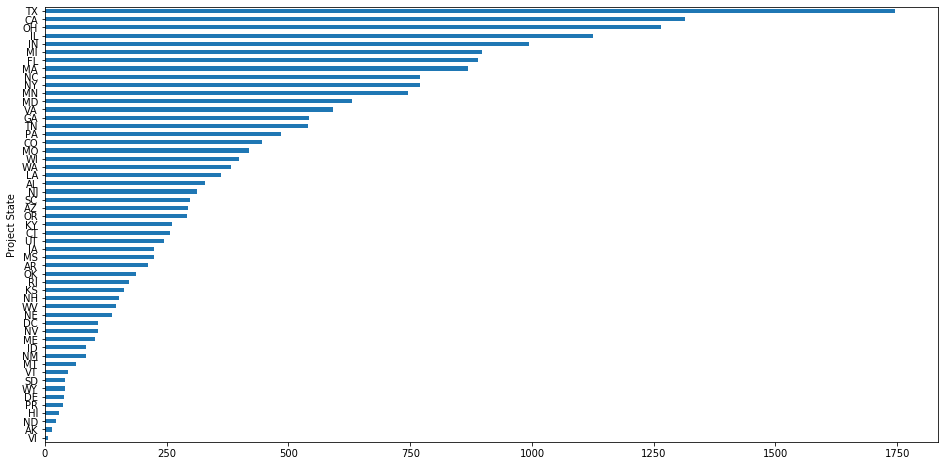

In [16]:
df.groupby(["Project State"]).fha_number.count().sort_values().plot.barh()
plt.show()

In [17]:
df.rename(columns={"Final Mortgage Amount": "final_mortgage"}, inplace=True)

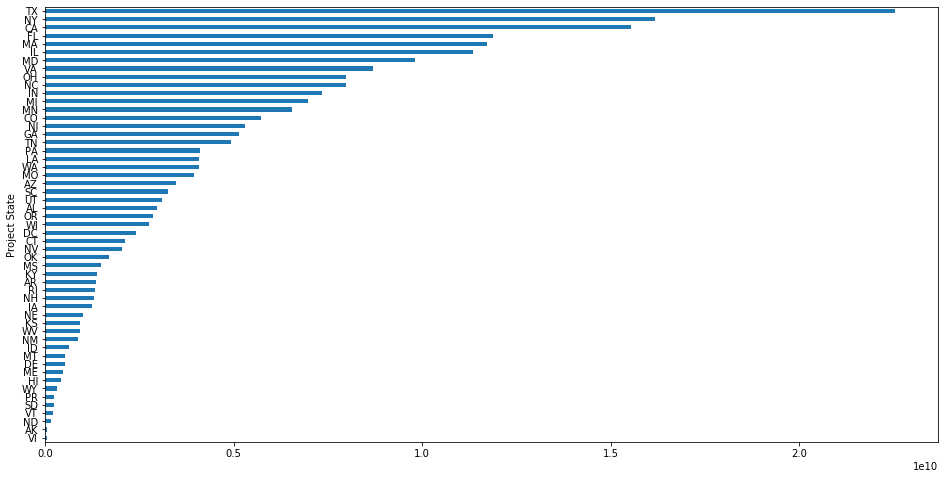

In [18]:
df.groupby(["Project State"]).final_mortgage.sum().sort_values().plot.barh()

In [19]:
df["Project City"].value_counts().head(20)

Chicago         346
Indianapolis    259
Columbus        173
Los Angeles     147
Houston         140
Boston          131
San Antonio     126
Baltimore       125
Atlanta         113
Dallas          113
Washington      104
New York         96
Denver           95
Cleveland        90
Portland         89
St. Louis        88
Cincinnati       84
Austin           83
Minneapolis      81
Richmond         78
Name: Project City, dtype: int64

In [20]:
df.groupby(["Project City", "Fiscal Year of Firm Commitment"]).size().sort_values()

Project City     Fiscal Year of Firm Commitment
 Corpus Christi  2012                               1
New Square       2013                               1
New Ulm          2006                               1
                 2008                               1
                 2014                               1
                                                   ..
Indianapolis     2012                              37
                 2011                              37
Chicago          2011                              43
                 2012                              45
                 2013                              46
Length: 12612, dtype: int64

In [21]:
df.groupby(["Project City", "Fiscal Year of Firm Commitment"])["final_mortgage"].sum().sort_values()

Project City  Fiscal Year of Firm Commitment
roxbury       2010                                      1
Aurora        2007                                  70100
Wolcottville  2017                                 114000
Covington     2006                                 125000
Cordele       2008                                 145000
                                                  ...    
Chicago       2011                              494045600
              2012                              520309300
New York      2013                              647062504
Trenton       2009                              760934400
Bronx         2013                              822430600
Name: final_mortgage, Length: 12612, dtype: int64

In [22]:
df[df["Project City"] == "Austin"].groupby("Fiscal Year of Firm Commitment")["final_mortgage"].sum()

Fiscal Year of Firm Commitment
2006     14083843
2007     21885300
2008      2635000
2009     18128300
2010     94857100
2011     28475900
2012     80729000
2013    276402300
2014    111088600
2015     69636500
2016     68436400
2017    142180000
2018    304965500
2019     74686900
2020    170281700
Name: final_mortgage, dtype: int64

In [23]:
df[df["Project City"] == "Minneapolis"].groupby("Fiscal Year of Firm Commitment")["final_mortgage"].sum()

Fiscal Year of Firm Commitment
2006     14121493
2007      4867400
2008     20531200
2009     22799500
2010     65656000
2011     89888142
2012    109929200
2013    120484104
2014    109086280
2015     72991300
2016     64554600
2017     86419600
2018     62178200
2019     36570200
Name: final_mortgage, dtype: int64

In [24]:
df[df["Project City"] == "Austin"].groupby("Fiscal Year of Firm Commitment")["final_mortgage"].sum()

Fiscal Year of Firm Commitment
2006     14083843
2007     21885300
2008      2635000
2009     18128300
2010     94857100
2011     28475900
2012     80729000
2013    276402300
2014    111088600
2015     69636500
2016     68436400
2017    142180000
2018    304965500
2019     74686900
2020    170281700
Name: final_mortgage, dtype: int64

In [25]:
df[df["Project City"] == "Austin"].groupby("Fiscal Year of Firm Commitment")["final_mortgage"].count()

Fiscal Year of Firm Commitment
2006     1
2007     2
2008     1
2009     1
2010     8
2011     3
2012     8
2013    17
2014     6
2015     5
2016     5
2017     8
2018    10
2019     4
2020     4
Name: final_mortgage, dtype: int64

In [26]:
df[df["Project City"] == "Austin"].groupby("Fiscal Year of Firm Commitment")["final_mortgage"].size()

Fiscal Year of Firm Commitment
2006     1
2007     2
2008     1
2009     1
2010     8
2011     3
2012     8
2013    17
2014     6
2015     5
2016     5
2017     8
2018    10
2019     4
2020     4
Name: final_mortgage, dtype: int64

In [27]:
# df.columns

In [28]:
# Noah's code
# let's see the number of unique values for each column
# for col in df.columns:
#     unique = len(df[col].unique())
#     if unique > 10:
#         print()
#         print(f'{col} has {unique} values')
#     else:
#         print()
#         print(f'{col} value count:')
#         print(df[col].value_counts())

**Takeaways**: There are hospitals in this data.

In [29]:
df.head()

,fha_number,Project Name,Project City,Project State,"Basic FHA, Risk Share or Other",Program Category,Activity Description,activity_group,facility_type,Program Designation,Firm Commitment Activity,Lender at Firm Commitment Activity,"Mortgage at time of Firm Commitment Issuance, Amendment or Reissuance",Unit or Bed Count,Date of Firm Commitment Activity,Fiscal Year of Firm Commitment Activity,Mortgage at Firm Commitment Issuance,Date of Firm Issue,Fiscal Year of Firm Commitment,MAP or TAP,LIHTC Designation,Tax Exempt Bond Designation,HOME Designation,CDBG Designation,Section 202 Refi Designation,IRP Decoupling Designation,HOPE VI Designation,Current Status,final_mortgage
0,11345004,Western Heights Apartments,Olney,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,277600,48,2005-10-01,2006,277600,2005-10-01,2006,TAP,0,0,0,0,0,0,0,Firm Comit then Owner Withdrew,271700
1,11345005,Woodlands Village Apts,Breckenridge,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,173000,88,2005-10-01,2006,173000,2005-10-01,2006,TAP,0,0,0,0,0,0,0,Finally Endorsed,168300
2,4235583,Harbor Court Apartments,Rocky River,OH,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,GREYSTONE SERVICING COMPANY LLC,3886800,120,2005-10-03,2006,3886800,2005-10-03,2006,TAP,0,0,0,0,0,0,0,Finally Endorsed,3886800
3,3297260,Compton Towne Apartments,Wilmington,DE,Risk Sharing,QPE Risk Sharing,Refinance,Refi/ Pchse,Coop/Apts/Mobile Home Pk/ALF,QPE Risk Shg Existing,Firm Issued,FEDERAL NATIONAL MORTGAGE,4000000,76,2005-10-03,2006,4000000,2005-10-03,2006,TAP,Y,0,0,0,0,0,0,Finally Endorsed,4000000
4,7135779,Evergreen Terrace I,Joliet,IL,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,REILLY MORTGAGE GRP,5129000,241,2005-10-04,2006,5129000,2005-10-04,2006,TAP,0,0,0,0,0,0,0,Firm Expired,5247700


In [30]:
df.dtypes

fha_number                                                                int64
Project Name                                                             object
Project City                                                             object
Project State                                                            object
Basic FHA, Risk Share or Other                                           object
Program Category                                                         object
Activity Description                                                     object
activity_group                                                           object
facility_type                                                            object
Program Designation                                                      object
Firm Commitment Activity                                                 object
Lender at Firm Commitment Activity                                       object
Mortgage at time of Firm Commitment Issu

In [31]:
# trying to get just the year from Date of Firm Issue
# df["Date of Firm Issue"] = pd.to_datetime(df["Date of Firm Issue"])
# df["Date of Firm Issue"].dt.year

---
## Wrangle

In [32]:
# using Noah's wrangle script
df = wr.wrangle_hud()
print(df.shape)
df.head()

(20917, 29)


,fha_number,project_name,project_city,project_state,basic_fha_risk_share_or_other,program_category,activity_description,activity_group,facility_type,program_designation,firm_commitment_activity,lender_at_firm_commitment_activity,mortgage_at_time_of_firm_commitment_issuance_amendment_or_reissuance,unit_or_bed_count,date_of_firm_commitment_activity,fiscal_year_of_firm_commitment_activity,mortgage_at_firm_commitment_issuance,date_of_firm_issue,fiscal_year_of_firm_commitment,map_or_tap,lihtc_designation,tax_exempt_bond_designation,home_designation,cdbg_designation,section_202_refi_designation,irp_decoupling_designation,hope_vi_designation,current_status,final_mortgage_amount
0,11345004,Western Heights Apartments,Olney,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,277600,48,2005-10-01,2006,277600,2005-10-01,2006,TAP,False,False,False,False,False,False,False,Firm Comit then Owner Withdrew,271700
1,11345005,Woodlands Village Apts,Breckenridge,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,173000,88,2005-10-01,2006,173000,2005-10-01,2006,TAP,False,False,False,False,False,False,False,Finally Endorsed,168300
2,4235583,Harbor Court Apartments,Rocky River,OH,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,GREYSTONE SERVICING COMPANY LLC,3886800,120,2005-10-03,2006,3886800,2005-10-03,2006,TAP,False,False,False,False,False,False,False,Finally Endorsed,3886800
3,3297260,Compton Towne Apartments,Wilmington,DE,Risk Sharing,QPE Risk Sharing,Refinance,Refi/ Pchse,Coop/Apts/Mobile Home Pk/ALF,QPE Risk Shg Existing,Firm Issued,FEDERAL NATIONAL MORTGAGE,4000000,76,2005-10-03,2006,4000000,2005-10-03,2006,TAP,True,False,False,False,False,False,False,Finally Endorsed,4000000
4,7135779,Evergreen Terrace I,Joliet,IL,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,REILLY MORTGAGE GRP,5129000,241,2005-10-04,2006,5129000,2005-10-04,2006,TAP,False,False,False,False,False,False,False,Firm Expired,5247700


In [33]:
# looks like the fiscal_year features are the same as the shape of the df below is the same as the inital df (above)
df[df.fiscal_year_of_firm_commitment_activity == df.fiscal_year_of_firm_commitment].shape

(20917, 29)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20917 entries, 0 to 20917
Data columns (total 29 columns):
 #   Column                                                                Non-Null Count  Dtype         
---  ------                                                                --------------  -----         
 0   fha_number                                                            20917 non-null  object        
 1   project_name                                                          20917 non-null  object        
 2   project_city                                                          20917 non-null  object        
 3   project_state                                                         20917 non-null  object        
 4   basic_fha_risk_share_or_other                                         20917 non-null  object        
 5   program_category                                                      20917 non-null  object        
 6   activity_description                  

---
## Explore
### What are the characteristics of loan practices in Houston (2009), Seattle (2010), and Dallas (2012)?
- Do these markets follow a similar trajectory in the years leading up the boom?

In [35]:
# fmt-clipboard function from terminal == black formatting
df[df.project_city == "Houston"].groupby(["date_of_firm_commitment_activity"])[
    "final_mortgage_amount"
].sum().reset_index().sort_values(by="date_of_firm_commitment_activity")

,date_of_firm_commitment_activity,final_mortgage_amount
0,2005-12-19,10114700
1,2006-04-24,12633300
2,2006-06-06,13852600
3,2006-08-15,2190000
4,2006-10-10,1872900
...,...,...
125,2019-07-19,7000000
126,2019-08-09,11300000
127,2019-08-13,10800000
128,2020-01-27,24320000


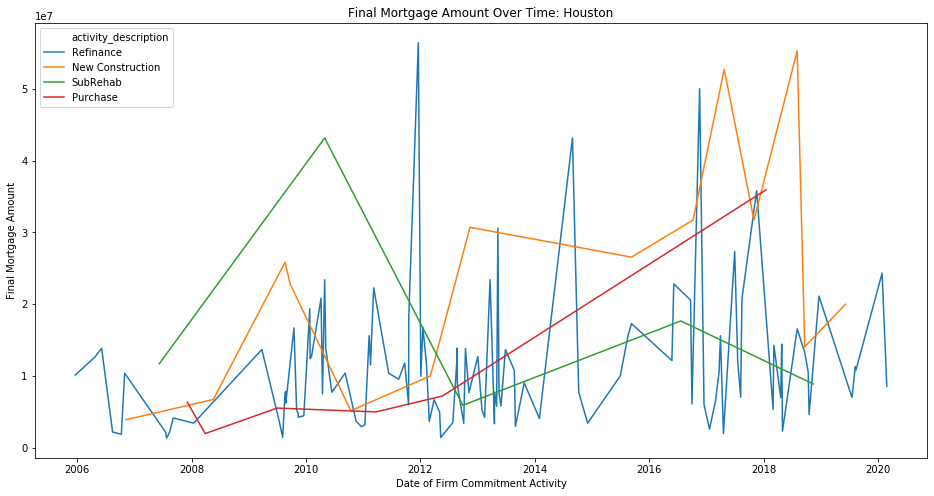

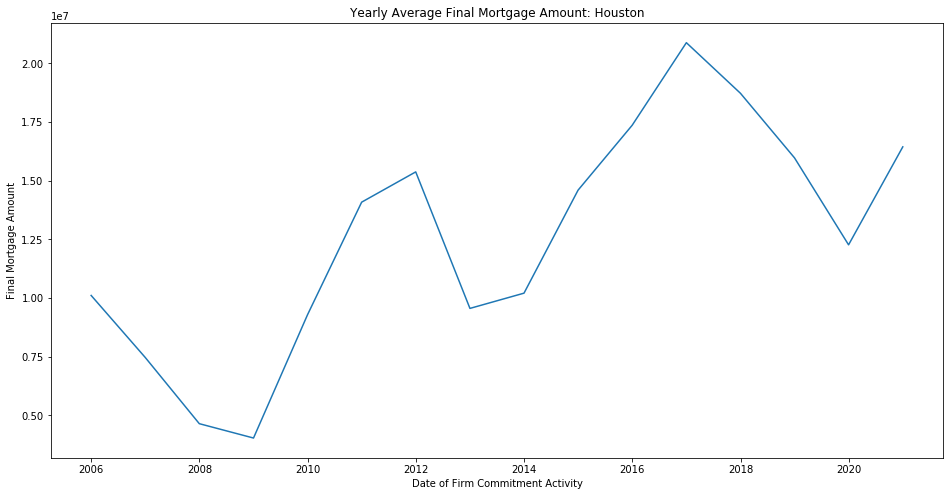

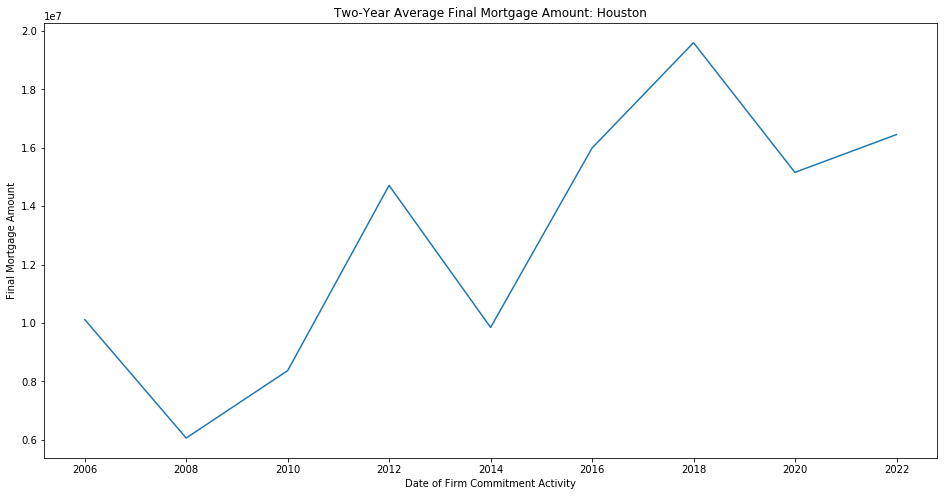

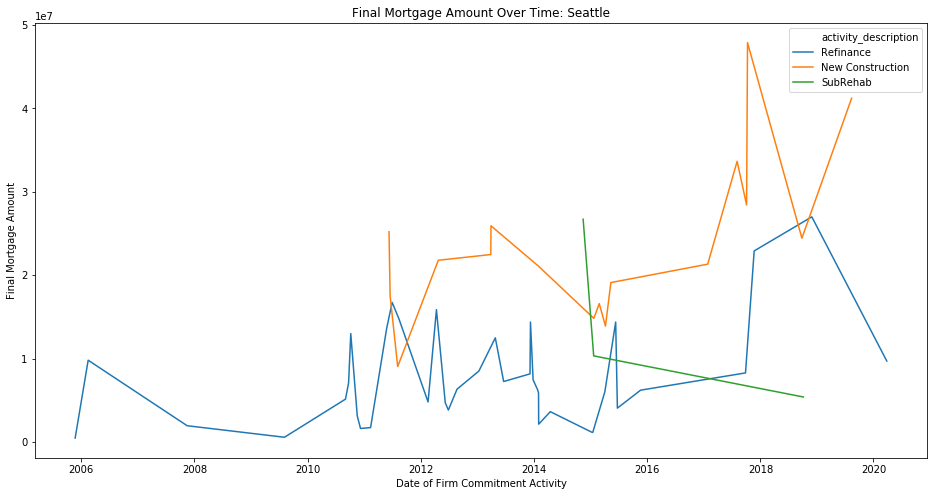

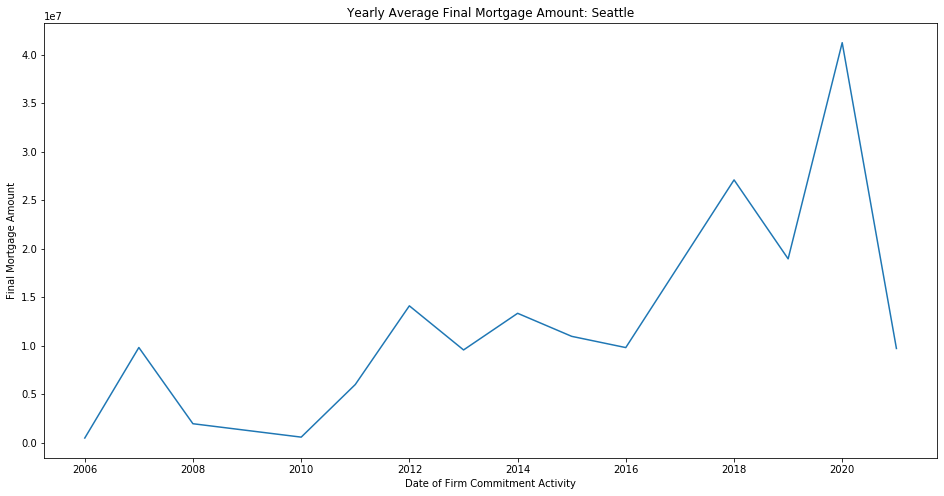

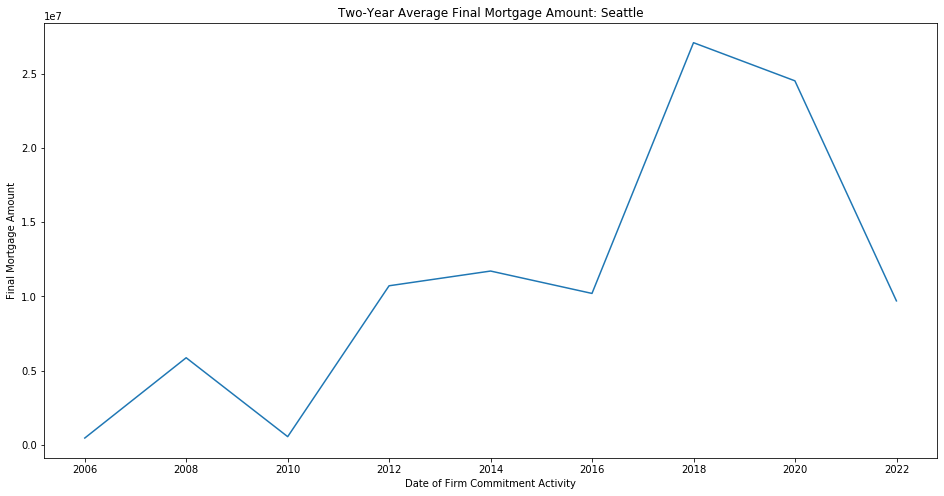

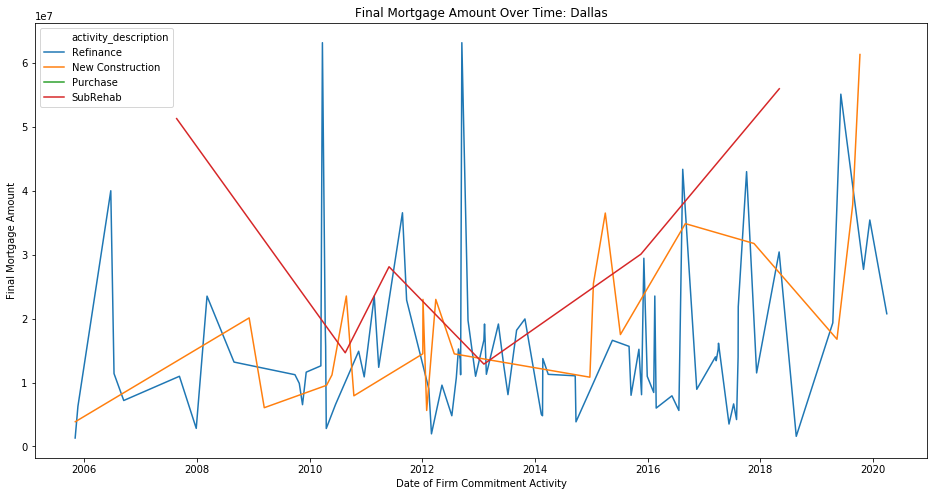

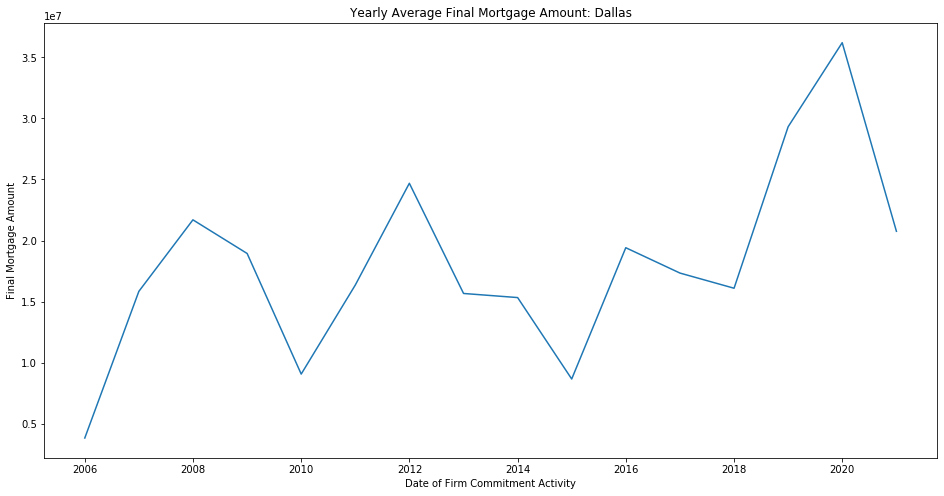

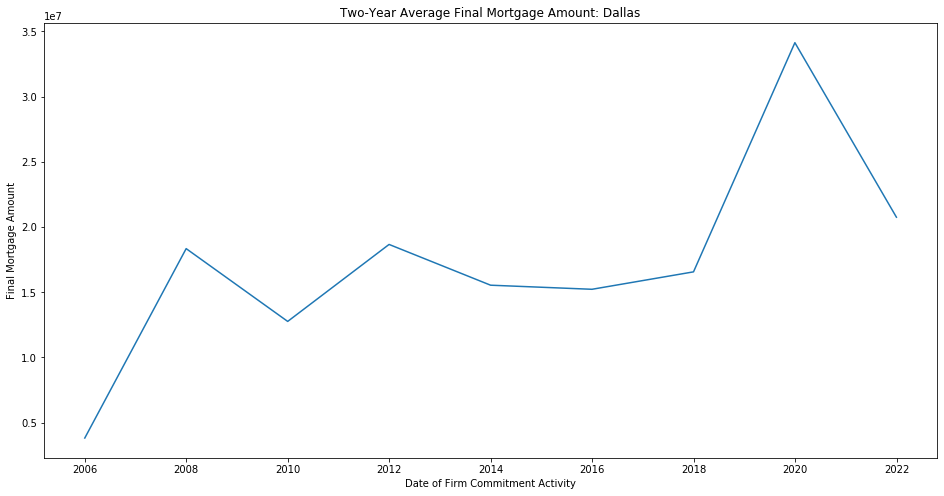

In [36]:
# cities stakeholder ID'd as markets he would have targeted if he had a time machine
# Houston in 2009
# Seattle in 2010
# Dallas in 2012
time_machine_cities = ["Houston", "Seattle", "Dallas"]

# loop through 
for city in time_machine_cities:
    
    # subset for city
    # set datetime index
    date_index_df = df[df.project_city == city].sort_values(
        "date_of_firm_commitment_activity"
    ).set_index("date_of_firm_commitment_activity")

    # sum of the final_mortgage_amount by date_of_firm_commitment_activity
    date_index_df = (
        date_index_df.groupby(["date_of_firm_commitment_activity", "activity_description"])[
            "final_mortgage_amount"
        ]
        .sum()
        .reset_index()
    )
    
    # set datetime index
    date_index_df.set_index("date_of_firm_commitment_activity", inplace=True)
    
    # plot every date with activity description legend
    sns.lineplot(data=date_index_df, x=date_index_df.index, y="final_mortgage_amount", hue="activity_description")
    plt.title(f"Final Mortgage Amount Over Time: {city}")
    plt.xlabel("Date of Firm Commitment Activity")
    plt.ylabel("Final Mortgage Amount")
    plt.show()
    
    # plot resampled data by year
    yearly_avg = date_index_df.resample('Y').mean()
    sns.lineplot(data=yearly_avg, x=yearly_avg.index, y="final_mortgage_amount")
    plt.title(f"Yearly Average Final Mortgage Amount: {city}")
    plt.xlabel("Date of Firm Commitment Activity")
    plt.ylabel("Final Mortgage Amount")
    plt.show()
    
    # plot resampled data by two years
    two_year_avg = date_index_df.resample('2Y').mean()
    sns.lineplot(data=two_year_avg, x=two_year_avg.index, y="final_mortgage_amount")
    plt.title(f"Two-Year Average Final Mortgage Amount: {city}")
    plt.xlabel("Date of Firm Commitment Activity")
    plt.ylabel("Final Mortgage Amount")
    plt.show()

**Takeaway**: What I observe in the charts above is that for the years that Clifton would have liked to enter into a market, the total final mortgage production for that city droped to $10M or less. We need to know from Clifton which markets he know's it's too late to target to derive a more general metric for labeling markets.

### Hypothesis Testing

$H_0$: The mean final mortgage amount is the same across all activity descriptions

$H_a$: The mean final mortgage amount is different depending on the activity description

In [37]:
df.activity_description.value_counts()

Refinance           16129
New Construction     2479
SubRehab             1429
Purchase              599
Additions             149
Improvements          119
Operating Loss         13
Name: activity_description, dtype: int64

In [38]:
# 99% confidence level
alpha = .01

refi = df[df.activity_description == "Refinance"].final_mortgage_amount
nc = df[df.activity_description == "New Construction"].final_mortgage_amount
sr = df[df.activity_description == "SubRehab"].final_mortgage_amount
purch = df[df.activity_description == "Purchase"].final_mortgage_amount
add = df[df.activity_description == "Additions"].final_mortgage_amount
imp = df[df.activity_description == "Improvements"].final_mortgage_amount
ol = df[df.activity_description == "Operating Loss"].final_mortgage_amount

stat, pvalue = stats.f_oneway(refi, nc, sr, purch, add, imp, ol)

print(f"statistic = {stat}")
print(f"  p-value = {pvalue}")
print()
if pvalue < alpha:
    print("Reject null hypothesis: The mean final mortgage amount is the same across all activity descriptions")
else:
    print("Fail to reject null hypothesis")

statistic = 196.84680942974384
  p-value = 5.109521483305493e-245

Reject null hypothesis: The mean final mortgage amount is the same across all activity descriptions


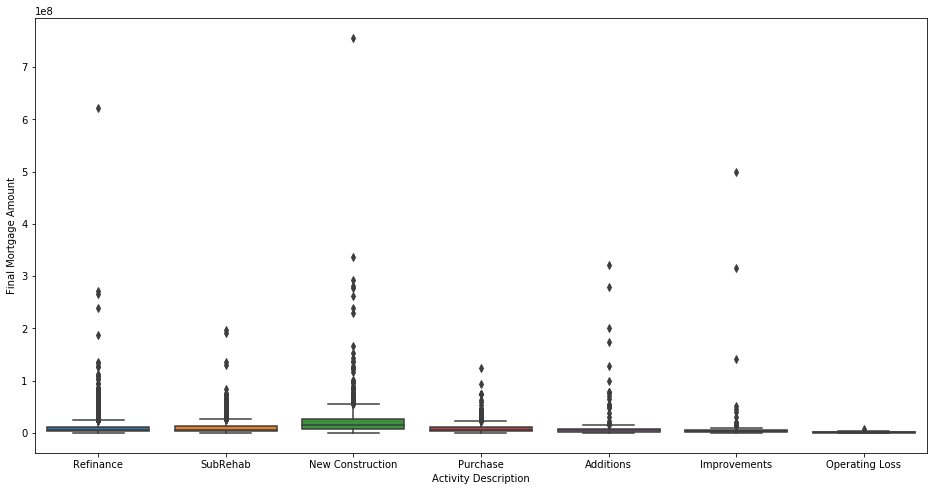

In [39]:
plt.figure(figsize=(16, 8))

sns.boxplot(data=df, x="activity_description", y="final_mortgage_amount")
plt.xlabel("Activity Description")
plt.ylabel("Final Mortgage Amount")
plt.show()

**Takeaways**: Looks like there are a lot of outliers that are skewing the data. However, we can clearly see that the new construction mortgages have the highest mean among the population.

$H_0$: The mean final mortgage amount is the same across all facility types

$H_a$: The mean final mortgage is different depending on the facility type

---
#### Detour To Standardize `project_city` Names

In [40]:
# pd.DataFrame(
#     df.groupby(["project_city", "fiscal_year_of_firm_commitment"])[
#         "final_mortgage_amount"
#     ]
#     .sum()
#     .sort_values(ascending=False)
#     .head(50)
# )

In [41]:
# df.project_city.unique()

In [42]:
# def standardize_city_name(date):
#     return re.sub(r"(\d{2})/(\d{2})/(\d{2})", r"20\3-\1-\2", date)

In [43]:
# regex = br""

# df["project_city"] = df.project_city.str.replace()

In [44]:
# (^[a-z]+)(.)([a-z]+)

In [45]:
# (^[A-Z][a-z]+)(\s?)([A-Z][a-z]+)

**Note**: No need for regex. Overcomplicating it. Instead use python `.strip()` and `.title()`

---

In [46]:
# df.groupby(["project_city", "fiscal_year_of_firm_commitment"])["final_mortgage_amount"].sum()

In [47]:
# number of unique cities before project_city string transformations
# len(df.project_city.unique())

In [48]:
# df["project_city"] = df.project_city.str.strip()

In [49]:
# df.groupby(["project_city", "fiscal_year_of_firm_commitment"])["final_mortgage_amount"].sum()

In [50]:
# number of unique cities after project_city .strip()
# len(df.project_city.unique())

In [51]:
# df["project_city"] = df.project_city.str.title()

In [52]:
# df.groupby(["project_city", "fiscal_year_of_firm_commitment"])["final_mortgage_amount"].sum()

In [53]:
# number of unique cities after project_city .title() case
# len(df.project_city.unique())

In [54]:
# df.groupby(["project_city", "fiscal_year_of_firm_commitment"])[
#     "final_mortgage_amount"
# ].sum().sort_values(ascending=False).head(50)

**Note**: All necessary transformations to standardize the city names have been applied to the wrangle_hud function

---
### Back on Track with Hypothesis Testing
$H_0$ : The mean final mortgage amount is the same across all facility types

$H_a$ : The mean final mortgage is different depending on the facility type

In [55]:
df.facility_type.value_counts()

Apts/Coops                            7427
Apts                                  6353
Nursing/ICF                           3811
Asst'd Livg                           1692
Coop/Apts/Mobile Home Pk/ALF          1230
Coop                                   143
Board & Care                           114
Hospital                               104
232 Health Care-NH/ICF, ALF or B&C      35
Mobile Home Pk                           5
SRO                                      3
Name: facility_type, dtype: int64

In [56]:
# 99% confidence level
alpha = .01

apts_coops = df[df.facility_type == "Apts/Coops"].final_mortgage_amount
apts = df[df.facility_type == "Apts"].final_mortgage_amount 
nursing_icf = df[df.facility_type == "Nursing/ICF"].final_mortgage_amount # intermediate care facility
alf = df[df.facility_type == "Asst'd Livg"].final_mortgage_amount # assisted living facility 
coop_apts_mh_alf = df[df.facility_type == "Coop/Apts/Mobile Home Pk/ALF"].final_mortgage_amount
coop = df[df.facility_type == "Coop"].final_mortgage_amount
bc = df[df.facility_type == "Board & Care"].final_mortgage_amount
hosp = df[df.facility_type == "Hospital"].final_mortgage_amount
health_care = df[df.facility_type == "232 Health Care-NH/ICF, ALF or B&C"].final_mortgage_amount
mobile_home = df[df.facility_type == "Mobile Home Pk"].final_mortgage_amount
sro = df[df.facility_type == "SRO"].final_mortgage_amount # single room occupancy 

stat, pvalue = stats.f_oneway(
    apts_coops,
    apts,
    nursing_icf,
    alf,
    coop_apts_mh_alf,
    coop,
    bc,
    hosp,
    health_care,
    mobile_home,
    sro
)


print(f"statistic = {stat}")
print(f"  p-value = {pvalue}")
print()
if pvalue < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

statistic = 303.0252603425895
  p-value = 0.0

Reject null hypothesis


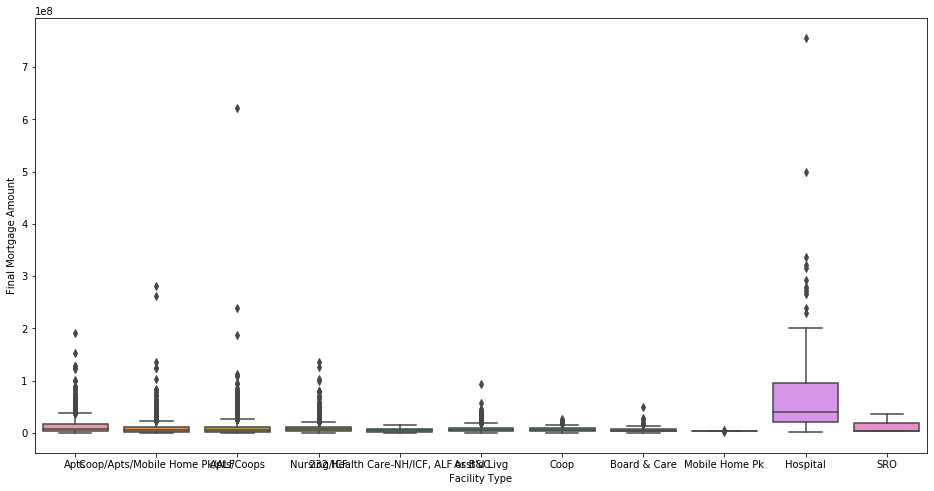

In [57]:
plt.figure(figsize=(16, 8))

sns.boxplot(data=df, x="facility_type", y="final_mortgage_amount")
plt.xlabel("Facility Type")
plt.ylabel("Final Mortgage Amount")
plt.show()

**Takeaways**: Statistical testing works best with normally distributed data. We are not working with normally distributed data, nor can we afford to remove the upper outliers in our dataset. I also think we should group some of these facilities together. There seems to be a lot of overlap. Based on the visualization above, hospitals seem to have the highest variance and mean mortgage amount.

## Preprocessing
Considerations:

- Some loans have been reissued. May need to take unique FHA numbers
    - **Update**: Noah fixed this issue with `.duplicated`
- Are we using the proper fiscal year feature?
    - **Update**: Now using `fiscal_year_of_firm_commitment_activity`
- We will engineer features here by calculating growth rates, mean mortgages over time, and other *benchmark* metrics

In [58]:
# grouping by city, state, and fiscal year or firm commitment
# aggregating final_mortgage_amount 
# sorting by sum and count in descending order
# model_df = df.groupby(["project_city", "project_state", "fiscal_year_of_firm_commitment", "activity_description"])[
#     "final_mortgage_amount"
# ].agg(["count", "sum", "mean", "median"]).sort_values(
#     by=["sum", "count"], ascending=False
# ).reset_index()

In [59]:
# print(model_df.shape)
# model_df.head(10)

In [60]:
# model_df.rename(
#     columns={
#         "project_city": "city",
#         "project_state": "state",
#         "fiscal_year_of_firm_commitment": "year",
#         "count": "quantity_of_mortgages",
#         "sum": "total_mortgage_amount",
#         "mean": "average_mortgage_amount",
#         "median": "median_mortgage_amount",
#     },
#     inplace=True,
# )

# model_df.head()

In [61]:
# df["label"] = np.where(
#     ((df.city == "Houston") & (df.state == "TX") & (df.year == 2009))
#     | ((df.city == "Seattle") & (df.state == "WA") & (df.year == 2010))
#     | ((df.city == "Dallas") & (df.state == "TX")  & (df.year == 2012)),
#     True,
#     False,
# )
# df.head()

In [62]:
# df[df["label"] == True]

**Note**: All transformations above have been added to `preprocessing.py`

---

In [63]:
df = pr.get_model_df()

In [64]:
print(df.shape)
df.head(10)

(13603, 12)


,city,state,year,quantity_of_mortgages_pop,total_mortgage_volume_pop,average_mortgage_volume_pop,median_mortgage_amount_pop,quantity_of_mortgages_nc,total_mortgage_volume_nc,average_mortgage_volume_nc,median_mortgage_amount_nc,label
0,Bronx,NY,2013,8,822430600,1.028038e+08,24774500.0,NaN,NaN,NaN,NaN,False
1,Trenton,NJ,2009,3,760934400,2.536448e+08,4100000.0,1.0,755874500.0,755874500.0,755874500.0,False
2,New York,NY,2013,7,647062504,9.243750e+07,27400000.0,1.0,9364704.0,9364704.0,9364704.0,False
3,Chicago,IL,2012,45,520309300,1.156243e+07,8300000.0,NaN,NaN,NaN,NaN,False
4,Chicago,IL,2011,43,494045600,1.148943e+07,8677500.0,1.0,5387000.0,5387000.0,5387000.0,False
5,Chicago,IL,2013,47,492413400,1.047688e+07,9485900.0,1.0,2486000.0,2486000.0,2486000.0,False
6,Boston,MA,2017,18,446376051,2.479867e+07,22724000.0,2.0,14890000.0,7445000.0,7445000.0,False
7,New York,NY,2017,11,434931700,3.953925e+07,15100000.0,4.0,120460000.0,30115000.0,25375000.0,False
8,New York,NY,2018,11,402496000,3.659055e+07,19000000.0,1.0,10670000.0,10670000.0,10670000.0,False
9,New York,NY,2019,9,391100000,4.345556e+07,48970000.0,2.0,66840000.0,33420000.0,33420000.0,False


In [65]:
df[df.label == True]

,city,state,year,quantity_of_mortgages_pop,total_mortgage_volume_pop,average_mortgage_volume_pop,median_mortgage_amount_pop,quantity_of_mortgages_nc,total_mortgage_volume_nc,average_mortgage_volume_nc,median_mortgage_amount_nc,label
61,Dallas,TX,2012,13,208688900,1.605299e+07,13600000.0,5.0,80597600.0,16119520.0,14490800.0,True
273,Houston,TX,2009,9,94747600,1.052751e+07,7600000.0,2.0,48635900.0,24317950.0,24317950.0,True
4973,Seattle,WA,2010,2,12208300,6.104150e+06,6104150.0,NaN,NaN,NaN,NaN,True


In [66]:
df.sort_values(by=["quantity_of_mortgages_pop"], ascending=False)

,city,state,year,quantity_of_mortgages_pop,total_mortgage_volume_pop,average_mortgage_volume_pop,median_mortgage_amount_pop,quantity_of_mortgages_nc,total_mortgage_volume_nc,average_mortgage_volume_nc,median_mortgage_amount_nc,label
5,Chicago,IL,2013,47,492413400,1.047688e+07,9485900.0,1.0,2486000.0,2.486000e+06,2486000.0,False
3,Chicago,IL,2012,45,520309300,1.156243e+07,8300000.0,NaN,NaN,NaN,NaN,False
4,Chicago,IL,2011,43,494045600,1.148943e+07,8677500.0,1.0,5387000.0,5.387000e+06,5387000.0,False
25,Indianapolis,IN,2012,37,296223600,8.006043e+06,5840000.0,3.0,21140000.0,7.046667e+06,3160000.0,False
47,Indianapolis,IN,2011,37,230783900,6.237403e+06,5250000.0,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6183,Harker Heights,TX,2015,1,9328000,9.328000e+06,9328000.0,NaN,NaN,NaN,NaN,False
6186,Wood River,IL,2008,1,9324500,9.324500e+06,9324500.0,NaN,NaN,NaN,NaN,False
6187,Marion,IA,2012,1,9324000,9.324000e+06,9324000.0,NaN,NaN,NaN,NaN,False
6188,Saint Cloud,MN,2014,1,9323100,9.323100e+06,9323100.0,NaN,NaN,NaN,NaN,False


In [67]:
df[(df.city == "Trenton") & (df.state == "NJ")].sort_values(by=["year"])

,city,state,year,quantity_of_mortgages_pop,total_mortgage_volume_pop,average_mortgage_volume_pop,median_mortgage_amount_pop,quantity_of_mortgages_nc,total_mortgage_volume_nc,average_mortgage_volume_nc,median_mortgage_amount_nc,label
1,Trenton,NJ,2009,3,760934400,2.536448e+08,4100000.0,1.0,755874500.0,755874500.0,755874500.0,False
4609,Trenton,NJ,2011,1,13262700,1.326270e+07,13262700.0,NaN,NaN,NaN,NaN,False
8814,Trenton,NJ,2012,2,5272400,2.636200e+06,2636200.0,NaN,NaN,NaN,NaN,False
7082,Trenton,NJ,2013,1,7618600,7.618600e+06,7618600.0,NaN,NaN,NaN,NaN,False
734,Trenton,NJ,2014,3,51800300,1.726677e+07,5989300.0,NaN,NaN,NaN,NaN,False
2065,Trenton,NJ,2015,2,26440000,1.322000e+07,13220000.0,NaN,NaN,NaN,NaN,False
4850,Trenton,NJ,2016,1,12604700,1.260470e+07,12604700.0,NaN,NaN,NaN,NaN,False


---
**Note**: Trenton, NJ is missing data

---
### Standup 06/19/2020

**Noah**:

Model observations perspective:
- Observation of city/state/year for each 
- **Essentially, no missing data for year**
- **CHECK**

**Other notes**:
- OHE activity description
    - **Update**: Scratch. Bool column based on activity description.
        - *Example*: `is_refi`
            - Use mean to get ration of refinances
            - Ratio of refi to nc
- Counting number of refinances for city/state/year

    
**Maggie**:
1. **Labels**
2. **Second Iteration Priorities**:
    - Create a feature that is an index of market interest based on regulation (i.e., ruling party in city/state)
    - NYC too heavily regulated
    - More blue cities are more heavily regulated
    - Weight of regulation?
        - Interest index due to regulation
        - If the index is high == high barrier of entry, low == low barrier of entry

---
### Back to Preprocessing

**Noah**: We only want to have cities and states that have 14 consecutive observations for our model (i.e., no missing years from the data)

In [68]:
df

,city,state,year,quantity_of_mortgages_pop,total_mortgage_volume_pop,average_mortgage_volume_pop,median_mortgage_amount_pop,quantity_of_mortgages_nc,total_mortgage_volume_nc,average_mortgage_volume_nc,median_mortgage_amount_nc,label
0,Bronx,NY,2013,8,822430600,1.028038e+08,24774500.0,NaN,NaN,NaN,NaN,False
1,Trenton,NJ,2009,3,760934400,2.536448e+08,4100000.0,1.0,755874500.0,755874500.0,755874500.0,False
2,New York,NY,2013,7,647062504,9.243750e+07,27400000.0,1.0,9364704.0,9364704.0,9364704.0,False
3,Chicago,IL,2012,45,520309300,1.156243e+07,8300000.0,NaN,NaN,NaN,NaN,False
4,Chicago,IL,2011,43,494045600,1.148943e+07,8677500.0,1.0,5387000.0,5387000.0,5387000.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
13598,Albany,GA,2008,1,152400,1.524000e+05,152400.0,NaN,NaN,NaN,NaN,False
13599,Cordele,GA,2008,1,145000,1.450000e+05,145000.0,NaN,NaN,NaN,NaN,False
13600,Covington,KY,2006,1,125000,1.250000e+05,125000.0,NaN,NaN,NaN,NaN,False
13601,Wolcottville,IN,2017,1,114000,1.140000e+05,114000.0,NaN,NaN,NaN,NaN,False


In [69]:
pd.DataFrame(df.groupby(["city", "state"]).size().reset_index())

,city,state,0
0,Abbeville,LA,1
1,Abbeville,SC,1
2,Aberdeen,MD,5
3,Aberdeen,SD,1
4,Aberdeen,WA,2
...,...,...,...
5252,Zephyhillis,FL,1
5253,Zephyrhills,FL,1
5254,Zion,IL,6
5255,Zionsville,IN,3


In [70]:
city_state = pd.DataFrame(df.groupby(["city", "state"]).size() == 14)

In [71]:
city_state = city_state.reset_index()
city_state

,city,state,0
0,Abbeville,LA,False
1,Abbeville,SC,False
2,Aberdeen,MD,False
3,Aberdeen,SD,False
4,Aberdeen,WA,False
...,...,...,...
5252,Zephyhillis,FL,False
5253,Zephyrhills,FL,False
5254,Zion,IL,False
5255,Zionsville,IN,False


In [72]:
city_state.rename(columns={0: "observations"}, inplace=True)

In [73]:
# these are the city + state combinations that have 14 consecutive year observations
city_state[city_state.observations == True]

,city,state,observations
258,Baton Rouge,LA,True
377,Birmingham,AL,True
523,Bronx,NY,True
531,Brooklyn,NY,True
783,Charlotte,NC,True
784,Charlottesville,VA,True
928,Colorado Springs,CO,True
935,Columbia,SC,True
948,Columbus,OH,True
1172,Denver,CO,True


In [74]:
# df["observations"] = np.where(df.groupby(["city", "state"]).size() == 14, True, False)

In [75]:
diff_df = pd.DataFrame(df.year.groupby([df.city, df.state]).diff().eq(14))
diff_df

,year
0,False
1,False
2,False
3,False
4,False
...,...
13598,False
13599,False
13600,False
13601,False


In [76]:
print(diff_df[diff_df.year == True].shape)
diff_df[diff_df.year == True]

(10, 1)


,year
1392,True
3039,True
3723,True
3867,True
5757,True
6016,True
7841,True
10191,True
12738,True
12743,True


**Note**: A solution to this problem has been reached.

---

#### Priorities Conversation with Daniel
- We need to create some metrics for *only* New Construction mortgages to create some features (like a ratio of New Construction to all mortgages).

In [77]:
df = wr.wrangle_hud()

In [78]:
df.head()

,fha_number,project_name,project_city,project_state,basic_fha_risk_share_or_other,program_category,activity_description,activity_group,facility_type,program_designation,firm_commitment_activity,lender_at_firm_commitment_activity,mortgage_at_time_of_firm_commitment_issuance_amendment_or_reissuance,unit_or_bed_count,date_of_firm_commitment_activity,fiscal_year_of_firm_commitment_activity,mortgage_at_firm_commitment_issuance,date_of_firm_issue,fiscal_year_of_firm_commitment,map_or_tap,lihtc_designation,tax_exempt_bond_designation,home_designation,cdbg_designation,section_202_refi_designation,irp_decoupling_designation,hope_vi_designation,current_status,final_mortgage_amount
0,11345004,Western Heights Apartments,Olney,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,277600,48,2005-10-01,2006,277600,2005-10-01,2006,TAP,False,False,False,False,False,False,False,Firm Comit then Owner Withdrew,271700
1,11345005,Woodlands Village Apts,Breckenridge,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,173000,88,2005-10-01,2006,173000,2005-10-01,2006,TAP,False,False,False,False,False,False,False,Finally Endorsed,168300
2,4235583,Harbor Court Apartments,Rocky River,OH,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,GREYSTONE SERVICING COMPANY LLC,3886800,120,2005-10-03,2006,3886800,2005-10-03,2006,TAP,False,False,False,False,False,False,False,Finally Endorsed,3886800
3,3297260,Compton Towne Apartments,Wilmington,DE,Risk Sharing,QPE Risk Sharing,Refinance,Refi/ Pchse,Coop/Apts/Mobile Home Pk/ALF,QPE Risk Shg Existing,Firm Issued,FEDERAL NATIONAL MORTGAGE,4000000,76,2005-10-03,2006,4000000,2005-10-03,2006,TAP,True,False,False,False,False,False,False,Finally Endorsed,4000000
4,7135779,Evergreen Terrace I,Joliet,IL,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,REILLY MORTGAGE GRP,5129000,241,2005-10-04,2006,5129000,2005-10-04,2006,TAP,False,False,False,False,False,False,False,Firm Expired,5247700


In [79]:
nc = df[df.activity_description == "New Construction"]
nc.head()

,fha_number,project_name,project_city,project_state,basic_fha_risk_share_or_other,program_category,activity_description,activity_group,facility_type,program_designation,firm_commitment_activity,lender_at_firm_commitment_activity,mortgage_at_time_of_firm_commitment_issuance_amendment_or_reissuance,unit_or_bed_count,date_of_firm_commitment_activity,fiscal_year_of_firm_commitment_activity,mortgage_at_firm_commitment_issuance,date_of_firm_issue,fiscal_year_of_firm_commitment,map_or_tap,lihtc_designation,tax_exempt_bond_designation,home_designation,cdbg_designation,section_202_refi_designation,irp_decoupling_designation,hope_vi_designation,current_status,final_mortgage_amount
9,5235624,Port Capital Village,Elkridge,MD,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,Firm Issued,AGM FINANCIAL SERVICES,5410000,84,2005-10-06,2006,5410000,2005-10-06,2006,MAP,False,True,True,False,False,False,False,Finally Endorsed,5410000
29,6135628,Veranda at the Villages at Carver,Atlanta,GA,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,Firm Issued,AMERICAN PROPERTY FINCG,3988000,90,2005-10-14,2006,3988000,2005-10-14,2006,MAP,True,False,False,False,False,False,False,Finally Endorsed,3988000
41,9235668,St. Anthony Mills Apartments,Minneapolis,MN,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,Firm Issued,GLASER FINANCIAL GRP,6140000,93,2005-10-17,2006,6140000,2005-10-17,2006,TAP,True,True,True,False,False,False,False,Finally Endorsed,6120000
50,6135631,Peabody Apartments,Columbus,GA,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,Firm Issued,"CAPMARK FINANCE, INC",3335000,184,2005-10-19,2006,3335000,2005-10-19,2006,MAP,True,False,False,False,False,False,True,Finally Endorsed,3335000
53,12335422,The Retreat at West Point Apartments,Surprise,AZ,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,Firm Issued,PARAGON MORTGAGE,12438700,142,2005-10-19,2006,12438700,2005-10-19,2006,MAP,False,False,False,False,False,False,False,Finally Endorsed,12438700


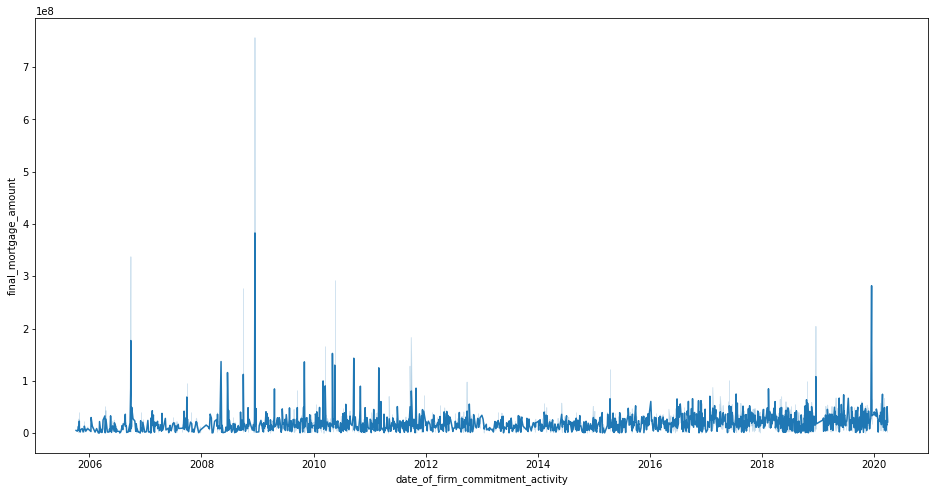

In [80]:
sns.lineplot(data=nc, x="date_of_firm_commitment_activity", y="final_mortgage_amount")
plt.show()

In [81]:
city_state_all_activity = pd.DataFrame(
    df.groupby(["project_city", "project_state", "fiscal_year_of_firm_commitment_activity", "activity_description"])["final_mortgage_amount"]
    .agg(["count", "sum"])
    .reset_index()
    .sort_values(by=["count", "sum"], ascending=False)
)

city_state_all_activity

,project_city,project_state,fiscal_year_of_firm_commitment_activity,activity_description,count,sum
2472,Chicago,IL,2013,Refinance,43,429142800
2469,Chicago,IL,2012,Refinance,41,476952400
2466,Chicago,IL,2011,Refinance,36,391132600
6446,Indianapolis,IN,2011,Refinance,35,218048900
6450,Indianapolis,IN,2012,Refinance,32,270433800
...,...,...,...,...,...,...
78,Albany,GA,2008,Refinance,1,152400
3063,Cordele,GA,2008,Refinance,1,145000
3159,Covington,KY,2006,SubRehab,1,125000
14949,Wolcottville,IN,2017,Refinance,1,114000


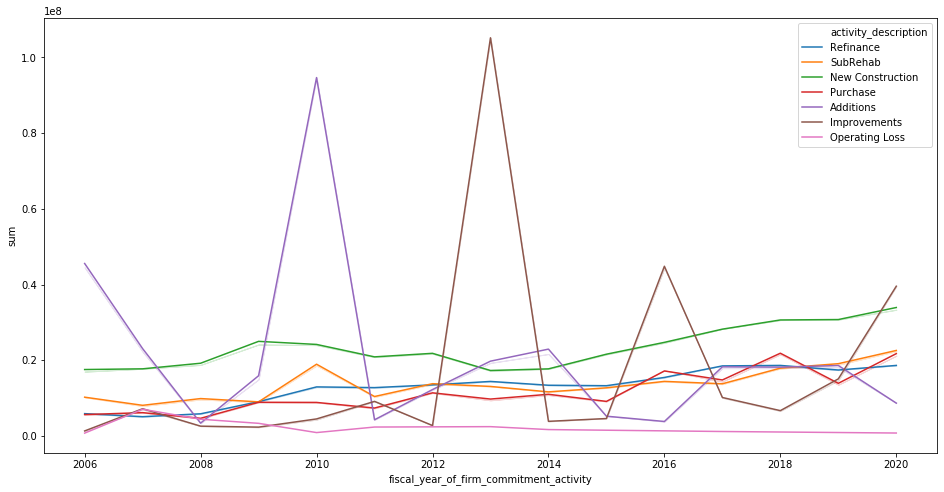

In [82]:
sns.lineplot(
    data=city_state_all_activity,
    x="fiscal_year_of_firm_commitment_activity",
    y="sum",
    hue="activity_description",
    ci=False
)

**Takeaway**: New Construction (NC) and SubRehab (SR) are growing steadily since 2014. Overall, NC is consistently where most of the mortgage loan volume is being allocated. *If we can find cities that are spending a lot on NC, we can ID those as markets to enter.* 

**Feature**: calculate the quantity and volume of NC for all cities, states, and years, so that we can classsify our data a little better.

In [83]:
nc_cities = pd.DataFrame(
    df.groupby(["project_city", "project_state", "date_of_firm_commitment_activity"])["final_mortgage_amount"]
    .agg(["count", "sum"])
    .reset_index()
    .sort_values(by=["count", "sum"], ascending=False)
)

nc_cities

,project_city,project_state,date_of_firm_commitment_activity,count,sum
3419,Chicago,IL,2012-11-29,5,63202700
3422,Chicago,IL,2013-01-09,5,63202700
263,Ames,IA,2014-06-10,5,52379000
1771,Boise,ID,2016-10-14,5,13470800
19128,Washington,DC,2013-07-31,5,8100000
...,...,...,...,...,...
14722,Pittsburgh,PA,2008-03-14,1,150000
4408,Cordele,GA,2008-01-30,1,145000
4524,Covington,KY,2006-07-13,1,125000
20010,Wolcottville,IN,2017-08-29,1,114000


In [84]:
atl = nc_cities[(nc_cities.project_city == "Atlanta") & (nc_cities.project_state == "GA")]
atl

,project_city,project_state,date_of_firm_commitment_activity,count,sum
670,Atlanta,GA,2014-02-26,2,25861400
649,Atlanta,GA,2012-10-18,2,16186100
664,Atlanta,GA,2013-06-27,2,14460600
606,Atlanta,GA,2007-04-18,2,13191300
617,Atlanta,GA,2009-07-24,2,11450000
...,...,...,...,...,...
639,Atlanta,GA,2011-10-17,1,1046800
603,Atlanta,GA,2006-12-07,1,828200
607,Atlanta,GA,2007-07-12,1,828200
609,Atlanta,GA,2007-08-29,1,450000


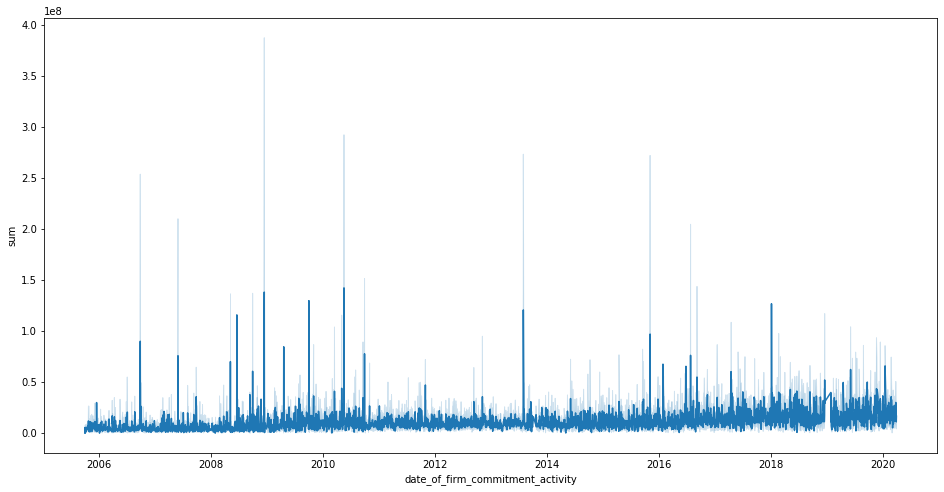

In [85]:
sns.lineplot(data=nc_cities, x="date_of_firm_commitment_activity", y="sum")

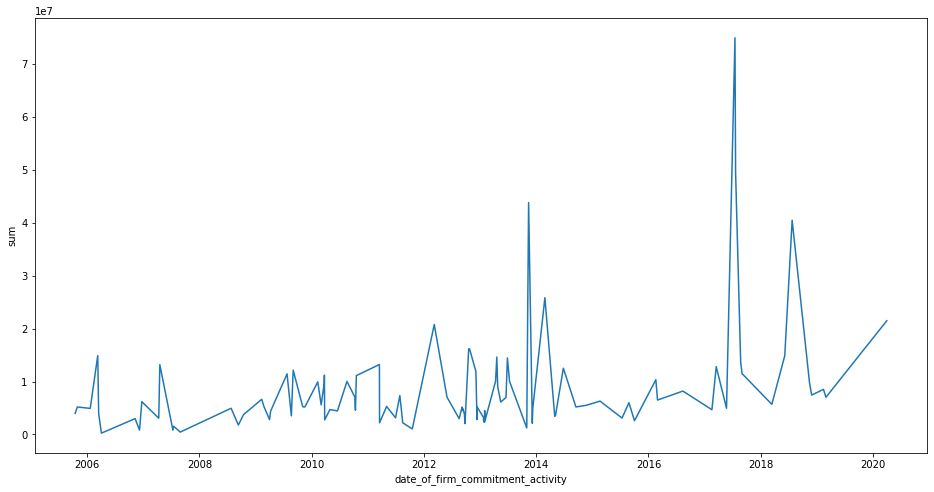

In [86]:
sns.lineplot(data=atl, x="date_of_firm_commitment_activity", y="sum")

---
### Returning to Preprocessing
Tasks:
- Add New Construction (NC) count and sum to preprocessing df
- Add ratios of NC to the total number of mortgages and sum of mortgages

#### Let's replicate Noah's preprocessing since that is what Daniel is working with

In [87]:
df = wr.wrangle_hud()
print(df.shape)
df.head()

(20917, 29)


,fha_number,project_name,project_city,project_state,basic_fha_risk_share_or_other,program_category,activity_description,activity_group,facility_type,program_designation,firm_commitment_activity,lender_at_firm_commitment_activity,mortgage_at_time_of_firm_commitment_issuance_amendment_or_reissuance,unit_or_bed_count,date_of_firm_commitment_activity,fiscal_year_of_firm_commitment_activity,mortgage_at_firm_commitment_issuance,date_of_firm_issue,fiscal_year_of_firm_commitment,map_or_tap,lihtc_designation,tax_exempt_bond_designation,home_designation,cdbg_designation,section_202_refi_designation,irp_decoupling_designation,hope_vi_designation,current_status,final_mortgage_amount
0,11345004,Western Heights Apartments,Olney,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,277600,48,2005-10-01,2006,277600,2005-10-01,2006,TAP,False,False,False,False,False,False,False,Firm Comit then Owner Withdrew,271700
1,11345005,Woodlands Village Apts,Breckenridge,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,173000,88,2005-10-01,2006,173000,2005-10-01,2006,TAP,False,False,False,False,False,False,False,Finally Endorsed,168300
2,4235583,Harbor Court Apartments,Rocky River,OH,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,GREYSTONE SERVICING COMPANY LLC,3886800,120,2005-10-03,2006,3886800,2005-10-03,2006,TAP,False,False,False,False,False,False,False,Finally Endorsed,3886800
3,3297260,Compton Towne Apartments,Wilmington,DE,Risk Sharing,QPE Risk Sharing,Refinance,Refi/ Pchse,Coop/Apts/Mobile Home Pk/ALF,QPE Risk Shg Existing,Firm Issued,FEDERAL NATIONAL MORTGAGE,4000000,76,2005-10-03,2006,4000000,2005-10-03,2006,TAP,True,False,False,False,False,False,False,Finally Endorsed,4000000
4,7135779,Evergreen Terrace I,Joliet,IL,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,REILLY MORTGAGE GRP,5129000,241,2005-10-04,2006,5129000,2005-10-04,2006,TAP,False,False,False,False,False,False,False,Firm Expired,5247700


In [88]:
def preprocessing_for_modeling(df):
    """function to manipulate df into df usable for modeling"""
    # city mask identifies 35 cities with most hud loans
    city_mask = df.project_city.value_counts().nlargest(35)
    # apply city mask to shrink the df
    def in_city_mask(x):
        return x in city_mask
    df = df[df.project_city.apply(in_city_mask)]
    #create a df for modelling that groups-by year and city aggregating mortgage amount by count, median, mean, and sum
    df_for_model = (df.groupby(['fiscal_year_of_firm_commitment_activity', 'project_city'])
         .final_mortgage_amount.agg(['count', 'median', 'mean', 'sum']).reset_index())
    df_for_model = df_for_model.rename(columns={'fiscal_year_of_firm_commitment_activity': 'year', 'project_city': 'city'})
    return df_for_model

In [89]:
df = preprocessing_for_modeling(df)
df

,year,city,count,median,mean,sum
0,2006,Atlanta,6,4457100.0,5.531133e+06,33186800
1,2006,Austin,1,14083843.0,1.408384e+07,14083843
2,2006,Baltimore,6,4570450.0,5.993167e+06,35959000
3,2006,Boston,7,3941300.0,7.059614e+06,49417300
4,2006,Bronx,7,1155300.0,3.298414e+06,23088900
...,...,...,...,...,...,...
505,2020,Portland,4,11486550.0,1.150535e+07,46021400
506,2020,Richmond,1,23534500.0,2.353450e+07,23534500
507,2020,San Antonio,4,17698200.0,1.791435e+07,71657400
508,2020,St. Louis,3,6316200.0,7.585433e+06,22756300


In [90]:
df.city.value_counts()

Memphis         15
Dallas          15
Atlanta         15
Columbia        15
Phoenix         15
Detroit         15
St. Louis       15
Cleveland       15
Austin          15
Minneapolis     15
New York        15
Houston         15
Cincinnati      15
Portland        15
Orlando         15
Chicago         15
Baltimore       15
Los Angeles     15
Boston          15
Columbus        15
Washington      15
Indianapolis    15
Richmond        14
Milwaukee       14
Jacksonville    14
Bronx           14
Madison         14
Brooklyn        14
Denver          14
Charlotte       14
Fort Worth      14
San Antonio     14
Greenville      14
Toledo          13
Knoxville       13
Name: city, dtype: int64

In [91]:
# What is the time range?

df.year.min(), df.year.max() 

(2006, 2020)

In [92]:
# mean rate of change

df["mean_var"] = df.sort_values(["city", "year"])["mean"].pct_change()

In [93]:
df = df.sort_values(["city", "year"])

In [94]:
df

,year,city,count,median,mean,sum,mean_var
0,2006,Atlanta,6,4457100.0,5.531133e+06,33186800,NaN
34,2007,Atlanta,9,2990200.0,3.233978e+06,29105800,-0.415314
67,2008,Atlanta,2,3367500.0,3.367500e+06,6735000,0.041287
99,2009,Atlanta,9,4400000.0,5.552544e+06,49972900,0.648862
131,2010,Atlanta,11,5196100.0,6.253490e+06,68788385,0.126239
...,...,...,...,...,...,...,...
373,2016,Washington,8,27352400.0,3.910451e+07,312836100,0.445886
407,2017,Washington,8,11693000.0,1.719466e+07,137557300,-0.560290
442,2018,Washington,7,25450000.0,2.417843e+07,169249000,0.406159
476,2019,Washington,5,9300000.0,1.234469e+07,61723450,-0.489434


In [95]:
# count rate of change

df["count_var"] = df.sort_values(["city", "year"])["count"].pct_change()
df

,year,city,count,median,mean,sum,mean_var,count_var
0,2006,Atlanta,6,4457100.0,5.531133e+06,33186800,NaN,NaN
34,2007,Atlanta,9,2990200.0,3.233978e+06,29105800,-0.415314,0.500000
67,2008,Atlanta,2,3367500.0,3.367500e+06,6735000,0.041287,-0.777778
99,2009,Atlanta,9,4400000.0,5.552544e+06,49972900,0.648862,3.500000
131,2010,Atlanta,11,5196100.0,6.253490e+06,68788385,0.126239,0.222222
...,...,...,...,...,...,...,...,...
373,2016,Washington,8,27352400.0,3.910451e+07,312836100,0.445886,0.000000
407,2017,Washington,8,11693000.0,1.719466e+07,137557300,-0.560290,0.000000
442,2018,Washington,7,25450000.0,2.417843e+07,169249000,0.406159,-0.125000
476,2019,Washington,5,9300000.0,1.234469e+07,61723450,-0.489434,-0.285714


In [96]:
# evolution index
# EI = (1 + Company Growth %) / (1 + Market Growth %) X 100

# How can I calculate the market growth for each year?

df["market_growth"] = df.groupby("year").mean_var.transform("mean")

In [97]:
df

,year,city,count,median,mean,sum,mean_var,count_var,market_growth
0,2006,Atlanta,6,4457100.0,5.531133e+06,33186800,NaN,NaN,-0.539085
34,2007,Atlanta,9,2990200.0,3.233978e+06,29105800,-0.415314,0.500000,0.548512
67,2008,Atlanta,2,3367500.0,3.367500e+06,6735000,0.041287,-0.777778,0.594319
99,2009,Atlanta,9,4400000.0,5.552544e+06,49972900,0.648862,3.500000,1.395160
131,2010,Atlanta,11,5196100.0,6.253490e+06,68788385,0.126239,0.222222,1.684237
...,...,...,...,...,...,...,...,...,...
373,2016,Washington,8,27352400.0,3.910451e+07,312836100,0.445886,0.000000,0.490671
407,2017,Washington,8,11693000.0,1.719466e+07,137557300,-0.560290,0.000000,0.403235
442,2018,Washington,7,25450000.0,2.417843e+07,169249000,0.406159,-0.125000,0.348374
476,2019,Washington,5,9300000.0,1.234469e+07,61723450,-0.489434,-0.285714,0.201454


In [98]:
df["ei"] = (1+ df.mean_var) / (1+ df.market_growth) * 100

In [99]:
model_df = df
model_df

,year,city,count,median,mean,sum,mean_var,count_var,market_growth,ei
0,2006,Atlanta,6,4457100.0,5.531133e+06,33186800,NaN,NaN,-0.539085,NaN
34,2007,Atlanta,9,2990200.0,3.233978e+06,29105800,-0.415314,0.500000,0.548512,37.757946
67,2008,Atlanta,2,3367500.0,3.367500e+06,6735000,0.041287,-0.777778,0.594319,65.312351
99,2009,Atlanta,9,4400000.0,5.552544e+06,49972900,0.648862,3.500000,1.395160,68.841431
131,2010,Atlanta,11,5196100.0,6.253490e+06,68788385,0.126239,0.222222,1.684237,41.957492
...,...,...,...,...,...,...,...,...,...,...
373,2016,Washington,8,27352400.0,3.910451e+07,312836100,0.445886,0.000000,0.490671,96.995684
407,2017,Washington,8,11693000.0,1.719466e+07,137557300,-0.560290,0.000000,0.403235,31.335472
442,2018,Washington,7,25450000.0,2.417843e+07,169249000,0.406159,-0.125000,0.348374,104.285561
476,2019,Washington,5,9300000.0,1.234469e+07,61723450,-0.489434,-0.285714,0.201454,42.495695


----
##### Now let's start working on adding NC data to Daniel's `model_df`

In [100]:
# df = wr.wrangle_hud()
# print(df.shape)
# df.head()

In [101]:
# example from article on building custom function to pass into .agg
# def test_sum(series):
#     return reduce(lambda x, y: x + y, series)

In [102]:
# write a lambda square function
# square = lambda x: x ** 2

In [103]:
# square(9)

In [104]:
# df.groupby(
#     ["fiscal_year_of_firm_commitment_activity", "project_city"]
# ).final_mortgage_amount.agg(["sum"])

In [105]:
# group = df.groupby(["project_city", "fiscal_year_of_firm_commitment_activity"])
# pd.DataFrame(
#     group.apply(
#         lambda x: x[x["activity_description"] == "New Construction"][
#             "final_mortgage_amount"
#         ].sum()
#     )
# ).reset_index()

In [106]:
# df.groupby(["fiscal_year_of_firm_commitment_activity", "project_city"])[
#     "final_mortgage_amount"
# ].agg(["count", "sum", "mean", "median"])

In [107]:
# def new_construction_mortgages(x):
#     return df[df["activity_description"] == "New Construction"].final_mortgage_amount.sum()

In [108]:
# df.groupby(["fiscal_year_of_firm_commitment_activity", "project_city"])[
#     "final_mortgage_amount"
# ].agg(["count", "sum", "mean", "median", "new_construction_mortgages"])

**Note**: No need to create a custom function to use with `.agg()`. Simply use `.merge` on the two DataFrames. Don't over complicate things, Alec 🙂

----

In [109]:
df = wr.wrangle_hud()
print(df.shape)
df.head()

(20917, 29)


,fha_number,project_name,project_city,project_state,basic_fha_risk_share_or_other,program_category,activity_description,activity_group,facility_type,program_designation,firm_commitment_activity,lender_at_firm_commitment_activity,mortgage_at_time_of_firm_commitment_issuance_amendment_or_reissuance,unit_or_bed_count,date_of_firm_commitment_activity,fiscal_year_of_firm_commitment_activity,mortgage_at_firm_commitment_issuance,date_of_firm_issue,fiscal_year_of_firm_commitment,map_or_tap,lihtc_designation,tax_exempt_bond_designation,home_designation,cdbg_designation,section_202_refi_designation,irp_decoupling_designation,hope_vi_designation,current_status,final_mortgage_amount
0,11345004,Western Heights Apartments,Olney,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,277600,48,2005-10-01,2006,277600,2005-10-01,2006,TAP,False,False,False,False,False,False,False,Firm Comit then Owner Withdrew,271700
1,11345005,Woodlands Village Apts,Breckenridge,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,173000,88,2005-10-01,2006,173000,2005-10-01,2006,TAP,False,False,False,False,False,False,False,Finally Endorsed,168300
2,4235583,Harbor Court Apartments,Rocky River,OH,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,GREYSTONE SERVICING COMPANY LLC,3886800,120,2005-10-03,2006,3886800,2005-10-03,2006,TAP,False,False,False,False,False,False,False,Finally Endorsed,3886800
3,3297260,Compton Towne Apartments,Wilmington,DE,Risk Sharing,QPE Risk Sharing,Refinance,Refi/ Pchse,Coop/Apts/Mobile Home Pk/ALF,QPE Risk Shg Existing,Firm Issued,FEDERAL NATIONAL MORTGAGE,4000000,76,2005-10-03,2006,4000000,2005-10-03,2006,TAP,True,False,False,False,False,False,False,Finally Endorsed,4000000
4,7135779,Evergreen Terrace I,Joliet,IL,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,REILLY MORTGAGE GRP,5129000,241,2005-10-04,2006,5129000,2005-10-04,2006,TAP,False,False,False,False,False,False,False,Firm Expired,5247700


In [110]:
# number of new construction projects
len(df[df.activity_description == "New Construction"])

2479

In [111]:
# ratio of new construction projects to total number of projects
len(df[df["activity_description"] == "New Construction"]) / len(df)

0.11851603958502653

In [112]:
# total number of mortgage dollars for new construction projects
df[df["activity_description"] == "New Construction"].final_mortgage_amount.sum()

50115653952

In [113]:
# ratio of new construction final_mortgage_amount to total final_mortgage_amount of all projects
df[
    df["activity_description"] == "New Construction"
].final_mortgage_amount.sum() / df.final_mortgage_amount.sum()

0.22336668010301566

In [114]:
nc_df = df[df.activity_description == "New Construction"]
nc_df

,fha_number,project_name,project_city,project_state,basic_fha_risk_share_or_other,program_category,activity_description,activity_group,facility_type,program_designation,firm_commitment_activity,lender_at_firm_commitment_activity,mortgage_at_time_of_firm_commitment_issuance_amendment_or_reissuance,unit_or_bed_count,date_of_firm_commitment_activity,fiscal_year_of_firm_commitment_activity,mortgage_at_firm_commitment_issuance,date_of_firm_issue,fiscal_year_of_firm_commitment,map_or_tap,lihtc_designation,tax_exempt_bond_designation,home_designation,cdbg_designation,section_202_refi_designation,irp_decoupling_designation,hope_vi_designation,current_status,final_mortgage_amount
9,5235624,Port Capital Village,Elkridge,MD,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,Firm Issued,AGM FINANCIAL SERVICES,5410000,84,2005-10-06,2006,5410000,2005-10-06,2006,MAP,False,True,True,False,False,False,False,Finally Endorsed,5410000
29,6135628,Veranda at the Villages at Carver,Atlanta,GA,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,Firm Issued,AMERICAN PROPERTY FINCG,3988000,90,2005-10-14,2006,3988000,2005-10-14,2006,MAP,True,False,False,False,False,False,False,Finally Endorsed,3988000
41,9235668,St. Anthony Mills Apartments,Minneapolis,MN,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,Firm Issued,GLASER FINANCIAL GRP,6140000,93,2005-10-17,2006,6140000,2005-10-17,2006,TAP,True,True,True,False,False,False,False,Finally Endorsed,6120000
50,6135631,Peabody Apartments,Columbus,GA,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,Firm Issued,"CAPMARK FINANCE, INC",3335000,184,2005-10-19,2006,3335000,2005-10-19,2006,MAP,True,False,False,False,False,False,True,Finally Endorsed,3335000
53,12335422,The Retreat at West Point Apartments,Surprise,AZ,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,Firm Issued,PARAGON MORTGAGE,12438700,142,2005-10-19,2006,12438700,2005-10-19,2006,MAP,False,False,False,False,False,False,False,Finally Endorsed,12438700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20883,8735318,KINGSTON PIKE VILLAGE,Farragut,TN,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,Firm Issued,NEWMARK KNIGHT FRANK,33860600,228,2020-03-24,2020,33860600,2020-03-24,2020,MAP,False,False,False,False,False,False,False,Firm Issued,33860600
20888,2398425,Mattapan Station 9%,Boston,MA,Risk Sharing,HFA Risk Sharing,New Construction,NC/SR,Coop/Apts/Mobile Home Pk/ALF,HFA Risk Shg NC/SR,Firm Issued,MASSACHUSETTS HFA,2140000,21,2020-03-24,2020,2140000,2020-03-24,2020,TAP,True,False,False,False,False,False,False,Firm Amended,2140000
20890,2398432,Whittier Phase 2,Boston,MA,Risk Sharing,HFA Risk Sharing,New Construction,NC/SR,Coop/Apts/Mobile Home Pk/ALF,HFA Risk Shg NC/SR,Firm Issued,MASSACHUSETTS HFA,15731824,52,2020-03-25,2020,15731824,2020-03-25,2020,TAP,True,True,False,False,False,False,False,Firm Amended,15731824
20905,8435405,Metro North Crossing Apartments,Kansas City,MO,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,Firm Issued,GERSHMAN INVESTMENT,50764200,249,2020-03-27,2020,50764200,2020-03-27,2020,MAP,False,False,False,False,False,False,False,Firm Issued,50764200


In [115]:
model_nc_df = preprocessing_for_modeling(nc_df)
model_nc_df

,year,city,count,median,mean,sum
0,2006,Atlanta,2,4590550,4590550.0,9181100
1,2006,Chicago,1,1136900,1136900.0,1136900
2,2006,Columbia,1,17214400,17214400.0,17214400
3,2006,Columbus,1,3335000,3335000.0,3335000
4,2006,Corpus Christi,1,3379100,3379100.0,3379100
...,...,...,...,...,...,...
297,2020,Portland,1,12073200,12073200.0,12073200
298,2020,Raleigh,1,33269100,33269100.0,33269100
299,2020,Salt Lake City,1,45283800,45283800.0,45283800
300,2020,San Antonio,2,27711800,27711800.0,55423600


In [116]:
model_df

,year,city,count,median,mean,sum,mean_var,count_var,market_growth,ei
0,2006,Atlanta,6,4457100.0,5.531133e+06,33186800,NaN,NaN,-0.539085,NaN
34,2007,Atlanta,9,2990200.0,3.233978e+06,29105800,-0.415314,0.500000,0.548512,37.757946
67,2008,Atlanta,2,3367500.0,3.367500e+06,6735000,0.041287,-0.777778,0.594319,65.312351
99,2009,Atlanta,9,4400000.0,5.552544e+06,49972900,0.648862,3.500000,1.395160,68.841431
131,2010,Atlanta,11,5196100.0,6.253490e+06,68788385,0.126239,0.222222,1.684237,41.957492
...,...,...,...,...,...,...,...,...,...,...
373,2016,Washington,8,27352400.0,3.910451e+07,312836100,0.445886,0.000000,0.490671,96.995684
407,2017,Washington,8,11693000.0,1.719466e+07,137557300,-0.560290,0.000000,0.403235,31.335472
442,2018,Washington,7,25450000.0,2.417843e+07,169249000,0.406159,-0.125000,0.348374,104.285561
476,2019,Washington,5,9300000.0,1.234469e+07,61723450,-0.489434,-0.285714,0.201454,42.495695


In [117]:
combined_df = pd.merge(model_df, model_nc_df, on=["year", "city"], how="left", suffixes=("_pop", "_nc"))
combined_df

,year,city,count_pop,median_pop,mean_pop,sum_pop,mean_var,count_var,market_growth,ei,count_nc,median_nc,mean_nc,sum_nc
0,2006,Atlanta,6,4457100.0,5.531133e+06,33186800,NaN,NaN,-0.539085,NaN,2.0,4590550.0,4590550.0,9181100.0
1,2007,Atlanta,9,2990200.0,3.233978e+06,29105800,-0.415314,0.500000,0.548512,37.757946,2.0,2270850.0,2270850.0,4541700.0
2,2008,Atlanta,2,3367500.0,3.367500e+06,6735000,0.041287,-0.777778,0.594319,65.312351,1.0,4950000.0,4950000.0,4950000.0
3,2009,Atlanta,9,4400000.0,5.552544e+06,49972900,0.648862,3.500000,1.395160,68.841431,1.0,3750000.0,3750000.0,3750000.0
4,2010,Atlanta,11,5196100.0,6.253490e+06,68788385,0.126239,0.222222,1.684237,41.957492,2.0,3601750.0,3601750.0,7203500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2016,Washington,8,27352400.0,3.910451e+07,312836100,0.445886,0.000000,0.490671,96.995684,2.0,27352400.0,27352400.0,54704800.0
506,2017,Washington,8,11693000.0,1.719466e+07,137557300,-0.560290,0.000000,0.403235,31.335472,1.0,12735000.0,12735000.0,12735000.0
507,2018,Washington,7,25450000.0,2.417843e+07,169249000,0.406159,-0.125000,0.348374,104.285561,3.0,15235000.0,15545000.0,46635000.0
508,2019,Washington,5,9300000.0,1.234469e+07,61723450,-0.489434,-0.285714,0.201454,42.495695,1.0,18333450.0,18333450.0,18333450.0


In [118]:
combined_df.head(10)

,year,city,count_pop,median_pop,mean_pop,sum_pop,mean_var,count_var,market_growth,ei,count_nc,median_nc,mean_nc,sum_nc
0,2006,Atlanta,6,4457100.0,5.531133e+06,33186800,NaN,NaN,-0.539085,NaN,2.0,4590550.0,4590550.0,9181100.0
1,2007,Atlanta,9,2990200.0,3.233978e+06,29105800,-0.415314,0.500000,0.548512,37.757946,2.0,2270850.0,2270850.0,4541700.0
2,2008,Atlanta,2,3367500.0,3.367500e+06,6735000,0.041287,-0.777778,0.594319,65.312351,1.0,4950000.0,4950000.0,4950000.0
3,2009,Atlanta,9,4400000.0,5.552544e+06,49972900,0.648862,3.500000,1.395160,68.841431,1.0,3750000.0,3750000.0,3750000.0
4,2010,Atlanta,11,5196100.0,6.253490e+06,68788385,0.126239,0.222222,1.684237,41.957492,2.0,3601750.0,3601750.0,7203500.0
5,2011,Atlanta,10,4341850.0,5.621590e+06,56215900,-0.101048,-0.090909,-0.129696,103.291828,2.0,4637250.0,4637250.0,9274500.0
6,2012,Atlanta,12,3250100.0,4.697158e+06,56365900,-0.164443,0.200000,0.089045,76.723838,1.0,3000000.0,3000000.0,3000000.0
7,2013,Atlanta,19,6133600.0,7.293832e+06,138582800,0.552818,0.583333,0.633389,95.067261,NaN,NaN,NaN,NaN
8,2014,Atlanta,12,5059850.0,9.376533e+06,112518400,0.285543,-0.368421,0.262575,101.819145,1.0,15861400.0,15861400.0,15861400.0
9,2015,Atlanta,4,5750000.0,5.225000e+06,20900000,-0.442758,-0.666667,0.318316,42.269244,1.0,5500000.0,5500000.0,5500000.0


In [119]:
combined_df.count_nc.sum()

406.0

In [120]:
len(combined_df[combined_df.count_nc.isna() == False])

208

In [121]:
len(combined_df[combined_df.count_nc.isna() == True])

302

---
#### Now it is time to merge the NC data to the updated model DataFrame from `preprocessing.py`

In [122]:
# original data from wrangle
df = wr.wrangle_hud()
print(df.shape)
df.head()

(20917, 29)


,fha_number,project_name,project_city,project_state,basic_fha_risk_share_or_other,program_category,activity_description,activity_group,facility_type,program_designation,firm_commitment_activity,lender_at_firm_commitment_activity,mortgage_at_time_of_firm_commitment_issuance_amendment_or_reissuance,unit_or_bed_count,date_of_firm_commitment_activity,fiscal_year_of_firm_commitment_activity,mortgage_at_firm_commitment_issuance,date_of_firm_issue,fiscal_year_of_firm_commitment,map_or_tap,lihtc_designation,tax_exempt_bond_designation,home_designation,cdbg_designation,section_202_refi_designation,irp_decoupling_designation,hope_vi_designation,current_status,final_mortgage_amount
0,11345004,Western Heights Apartments,Olney,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,277600,48,2005-10-01,2006,277600,2005-10-01,2006,TAP,False,False,False,False,False,False,False,Firm Comit then Owner Withdrew,271700
1,11345005,Woodlands Village Apts,Breckenridge,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,173000,88,2005-10-01,2006,173000,2005-10-01,2006,TAP,False,False,False,False,False,False,False,Finally Endorsed,168300
2,4235583,Harbor Court Apartments,Rocky River,OH,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,GREYSTONE SERVICING COMPANY LLC,3886800,120,2005-10-03,2006,3886800,2005-10-03,2006,TAP,False,False,False,False,False,False,False,Finally Endorsed,3886800
3,3297260,Compton Towne Apartments,Wilmington,DE,Risk Sharing,QPE Risk Sharing,Refinance,Refi/ Pchse,Coop/Apts/Mobile Home Pk/ALF,QPE Risk Shg Existing,Firm Issued,FEDERAL NATIONAL MORTGAGE,4000000,76,2005-10-03,2006,4000000,2005-10-03,2006,TAP,True,False,False,False,False,False,False,Finally Endorsed,4000000
4,7135779,Evergreen Terrace I,Joliet,IL,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,REILLY MORTGAGE GRP,5129000,241,2005-10-04,2006,5129000,2005-10-04,2006,TAP,False,False,False,False,False,False,False,Firm Expired,5247700


---
**Note**: I have replicated Daniel's code in order to understand what all is happening.

In [123]:
# # model df from preprocessing 
# df = pr.get_model_df()
# print(df.shape)
# df.head()

In [124]:
# # using add_new_features from preprocessing
# df = pr.add_new_features(df)
# print(df.shape)
# df.head()

In [125]:
# df["city_state"] = df["city"] + "_" + df["state"]
# df.head()

In [126]:
# city_mask = df.groupby("city_state").year.count()
# city_mask

In [127]:
# city_mask = city_mask[city_mask == 15]
# city_mask

In [128]:
# # apply city mask to shrink the df
# def in_city_mask(x):
#     return x in city_mask

In [129]:
# df = df[df.city_state.apply(in_city_mask)]
# df.head()

In [130]:
# df = df.sort_values(["city", "state", "year"])
# df.head()

In [131]:
# features_for_modeling = ["quantity_var", "observation_id", "ei", "label"]
# features_for_modeling

In [132]:
# # To avoid Nan's, I have removed all data from 2006 (because all the var's would be nan)
# df_model = df[df.year > 2006]
# df_model

In [133]:
# # Create an observation id to reduce the chance of mistake's
# df_model["observation_id"] = df_model.city + "_" + df_model.state + "_"  + df_model.year.astype(str)

In [134]:
# df_model

In [135]:
# # select that features that we want to model, and use our observation id as the row id
# data = df_model[features_for_modeling].set_index("observation_id")

In [136]:
# data

In [137]:
# X_train, y_train, X_test, y_test = pr.prep_data_for_modeling(df, features_for_modeling)

In [138]:
# X_train

**UNDERSTOOD**

---

In [139]:
df = wr.wrangle_hud()
print(df.shape)
df.head()

(20917, 29)


,fha_number,project_name,project_city,project_state,basic_fha_risk_share_or_other,program_category,activity_description,activity_group,facility_type,program_designation,firm_commitment_activity,lender_at_firm_commitment_activity,mortgage_at_time_of_firm_commitment_issuance_amendment_or_reissuance,unit_or_bed_count,date_of_firm_commitment_activity,fiscal_year_of_firm_commitment_activity,mortgage_at_firm_commitment_issuance,date_of_firm_issue,fiscal_year_of_firm_commitment,map_or_tap,lihtc_designation,tax_exempt_bond_designation,home_designation,cdbg_designation,section_202_refi_designation,irp_decoupling_designation,hope_vi_designation,current_status,final_mortgage_amount
0,11345004,Western Heights Apartments,Olney,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,277600,48,2005-10-01,2006,277600,2005-10-01,2006,TAP,False,False,False,False,False,False,False,Firm Comit then Owner Withdrew,271700
1,11345005,Woodlands Village Apts,Breckenridge,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,173000,88,2005-10-01,2006,173000,2005-10-01,2006,TAP,False,False,False,False,False,False,False,Finally Endorsed,168300
2,4235583,Harbor Court Apartments,Rocky River,OH,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,GREYSTONE SERVICING COMPANY LLC,3886800,120,2005-10-03,2006,3886800,2005-10-03,2006,TAP,False,False,False,False,False,False,False,Finally Endorsed,3886800
3,3297260,Compton Towne Apartments,Wilmington,DE,Risk Sharing,QPE Risk Sharing,Refinance,Refi/ Pchse,Coop/Apts/Mobile Home Pk/ALF,QPE Risk Shg Existing,Firm Issued,FEDERAL NATIONAL MORTGAGE,4000000,76,2005-10-03,2006,4000000,2005-10-03,2006,TAP,True,False,False,False,False,False,False,Finally Endorsed,4000000
4,7135779,Evergreen Terrace I,Joliet,IL,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,REILLY MORTGAGE GRP,5129000,241,2005-10-04,2006,5129000,2005-10-04,2006,TAP,False,False,False,False,False,False,False,Firm Expired,5247700


In [140]:
df.final_mortgage_amount.sum()

224364949727

In [141]:
# get new construction model df

# subset data from wrangle_hud
nc_df = df[df.activity_description == "New Construction"]
print(nc_df.shape)
nc_df.head()

(2479, 29)


,fha_number,project_name,project_city,project_state,basic_fha_risk_share_or_other,program_category,activity_description,activity_group,facility_type,program_designation,firm_commitment_activity,lender_at_firm_commitment_activity,mortgage_at_time_of_firm_commitment_issuance_amendment_or_reissuance,unit_or_bed_count,date_of_firm_commitment_activity,fiscal_year_of_firm_commitment_activity,mortgage_at_firm_commitment_issuance,date_of_firm_issue,fiscal_year_of_firm_commitment,map_or_tap,lihtc_designation,tax_exempt_bond_designation,home_designation,cdbg_designation,section_202_refi_designation,irp_decoupling_designation,hope_vi_designation,current_status,final_mortgage_amount
9,5235624,Port Capital Village,Elkridge,MD,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,Firm Issued,AGM FINANCIAL SERVICES,5410000,84,2005-10-06,2006,5410000,2005-10-06,2006,MAP,False,True,True,False,False,False,False,Finally Endorsed,5410000
29,6135628,Veranda at the Villages at Carver,Atlanta,GA,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,Firm Issued,AMERICAN PROPERTY FINCG,3988000,90,2005-10-14,2006,3988000,2005-10-14,2006,MAP,True,False,False,False,False,False,False,Finally Endorsed,3988000
41,9235668,St. Anthony Mills Apartments,Minneapolis,MN,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,Firm Issued,GLASER FINANCIAL GRP,6140000,93,2005-10-17,2006,6140000,2005-10-17,2006,TAP,True,True,True,False,False,False,False,Finally Endorsed,6120000
50,6135631,Peabody Apartments,Columbus,GA,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,Firm Issued,"CAPMARK FINANCE, INC",3335000,184,2005-10-19,2006,3335000,2005-10-19,2006,MAP,True,False,False,False,False,False,True,Finally Endorsed,3335000
53,12335422,The Retreat at West Point Apartments,Surprise,AZ,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,Firm Issued,PARAGON MORTGAGE,12438700,142,2005-10-19,2006,12438700,2005-10-19,2006,MAP,False,False,False,False,False,False,False,Finally Endorsed,12438700


In [142]:
nc_df.final_mortgage_amount.sum()

50115653952

In [143]:
# grouping by project_city, project_state, and fiscal_year_of_firm_commitment
# aggregating final_mortgage_amount
# sorting by sum and count in descending order
nc_model_df = (
    nc_df.groupby(
        ["project_city", "project_state", "fiscal_year_of_firm_commitment_activity"]
    )["final_mortgage_amount"]
    .agg(["count", "sum", "mean", "median"])
    .reset_index()
)

nc_model_df

,project_city,project_state,fiscal_year_of_firm_commitment_activity,count,sum,mean,median
0,Aberdeen,MD,2013,1,27247100,27247100.0,27247100
1,Abingdon,MD,2017,1,26830900,26830900.0,26830900
2,Abington,MD,2015,1,8229000,8229000.0,8229000
3,Acworth,GA,2018,1,4808600,4808600.0,4808600
4,Addis,LA,2008,1,11971700,11971700.0,11971700
...,...,...,...,...,...,...,...
2079,Yulee,FL,2020,1,30091700,30091700.0,30091700
2080,Yuma,AZ,2008,2,2000000,1000000.0,1000000
2081,Zachary,LA,2008,1,29028400,29028400.0,29028400
2082,Zachary,LA,2013,1,20787900,20787900.0,20787900


In [144]:
# rename the features
nc_model_df.rename(
    columns={
        "project_city": "city",
        "project_state": "state",
        "fiscal_year_of_firm_commitment_activity": "year",
        "count": "quantity_of_mortgages",
        "sum": "total_mortgage_amount",
        "mean": "average_mortgage_amount",
        "median": "median_mortgage_amount",
    },
    inplace=True,
)

nc_model_df

,city,state,year,quantity_of_mortgages,total_mortgage_amount,average_mortgage_amount,median_mortgage_amount
0,Aberdeen,MD,2013,1,27247100,27247100.0,27247100
1,Abingdon,MD,2017,1,26830900,26830900.0,26830900
2,Abington,MD,2015,1,8229000,8229000.0,8229000
3,Acworth,GA,2018,1,4808600,4808600.0,4808600
4,Addis,LA,2008,1,11971700,11971700.0,11971700
...,...,...,...,...,...,...,...
2079,Yulee,FL,2020,1,30091700,30091700.0,30091700
2080,Yuma,AZ,2008,2,2000000,1000000.0,1000000
2081,Zachary,LA,2008,1,29028400,29028400.0,29028400
2082,Zachary,LA,2013,1,20787900,20787900.0,20787900


In [145]:
# # model df from preprocessing 
# df = pr.get_model_df()
# print(df.shape)
# df.head()

In [146]:
# # using add_new_features from preprocessing
# df = pr.add_new_features(df)
# print(df.shape)
# df.head()

In [147]:
# # model df from preprocessing 
# model_df = pr.get_model_df()
# print(model_df.shape)
# model_df.head()

In [148]:
# # creat city_state feature
# df["city_state"] = df["city"] + "_" + df["state"]
# df.head()

In [149]:
# combined_df = pd.merge(df, nc_model_df, on=["city", "state", "year"], how="left", suffixes=("_pop", "_nc"))
# combined_df

In [150]:
# combined_df.total_mortgage_amount_pop.sum()

In [151]:
# combined_df.total_mortgage_amount_nc.sum()

**Note**: Successfully merged DataFrames

In [152]:
# df = combined_df
# print(df.shape)
# df.head()

In [153]:
# city_mask = df.groupby("city_state").year.count()

# city_mask = city_mask[city_mask == 15]

# # apply city mask to shrink the df
# def in_city_mask(x):
#     return x in city_mask

# df = df[df.city_state.apply(in_city_mask)]

# df = df.sort_values(["city", "state", "year"])
# df.head()

In [154]:
# df.reset_index(inplace=True)
# df

In [155]:
# df.drop(columns=["index"])

---
#### Adding New Construction Code to `preprocessing.py` Script

In [156]:
# # calling wrangle_hud to get original data
# df = wr.wrangle_hud()

# # subsetting df for New Construction
# nc_df = df[df.activity_description == "New Construction"]

# # grouping nc_df in the same way as the data in the get_model_df function
# nc_model_df = (
#     nc_df.groupby(
#         ["project_city", "project_state", "fiscal_year_of_firm_commitment_activity"]
#     )["final_mortgage_amount"]
#     .agg(["count", "sum", "mean", "median"])
#     .reset_index()
# )

# # rename the columns in the nc_model_df
# nc_model_df.rename(
#     columns={
#         "project_city": "city",
#         "project_state": "state",
#         "fiscal_year_of_firm_commitment_activity": "year",
#         "count": "quantity_of_mortgages",
#         "sum": "total_mortgage_amount",
#         "mean": "average_mortgage_amount",
#         "median": "median_mortgage_amount",
#     },
#     inplace=True,
# )

# # calling get_model_df
# model_df = pr.get_model_df()

# # creating city_state ID
# model_df["city_state"] = model_df["city"] + "_" + model_df["state"]

# # merging model_df and nc_model_df on city, state, and year and suffixing the features with the same names 
# # appropriately
# combined_df = pd.merge(model_df, nc_model_df, on=["city", "state", "year"], how="left", suffixes=("_pop", "_nc"))
# print(combined_df.shape)
# combined_df.head()

In [157]:
# # reassigning the model_df variable to the combined DataFrame created in the cell above
# model_df = combined_df

# # creating city_mask varible using the value counts of the years for each city_state
# city_mask = model_df.groupby("city_state").year.count()

# # masking the city_mask variable to only include city_states where there are 15 year observations
# # by doing this we ensure that we are working with city_states that have data for 2006-2020 Q2 
# city_mask = city_mask[city_mask == 15]

# # write a function to shrink the df
# def in_city_mask(x):
#     return x in city_mask

# # apply city mask to shrink the df
# model_df = model_df[model_df.city_state.apply(in_city_mask)]

# # sort_values of model_df by city, state, and year
# model_df = model_df.sort_values(["city", "state", "year"])
# print(model_df.shape)
# model_df

---
#### Testing updated script

In [158]:
# testing the updated get_model_df function
model_df = pr.get_model_df()

# calling add_new_features that Daniel created
model_df = pr.add_new_features(model_df)
print(model_df.shape)

(13603, 22)


In [159]:
model_df[
    ((model_df.city == "Atlanta") & (model_df.state == "GA"))
    | ((model_df.city == "Austin") & (model_df.state == "TX"))
].sort_values(by=["city", "state", "year"])


,city,state,year,quantity_of_mortgages_pop,total_mortgage_volume_pop,average_mortgage_volume_pop,median_mortgage_amount_pop,quantity_of_mortgages_nc,total_mortgage_volume_nc,average_mortgage_volume_nc,median_mortgage_amount_nc,label,city_state_vol_delta_pop,city_state_vol_delta_nc,city_state_qty_delta_pop,city_state_qty_delta_nc,market_volume_pop,market_volume_delta_pop,market_volume_nc,market_volume_delta_nc,ei_pop,ei_nc
1513,Atlanta,GA,2006,6,33186800,5.531133e+06,4457100.0,2.0,9181100.0,4.590550e+06,4590550.0,False,NaN,NaN,NaN,NaN,7088073068,NaN,1.665922e+09,NaN,NaN,NaN
1815,Atlanta,GA,2007,9,29105800,3.233978e+06,2990200.0,2.0,4541700.0,2.270850e+06,2270850.0,False,-0.122971,-0.505321,0.500000,0.000000,5203386464,-0.265895,1.506388e+09,-0.095764,1.194693,0.547069
7673,Atlanta,GA,2008,2,6735000,3.367500e+06,3367500.0,1.0,4950000.0,4.950000e+06,4950000.0,False,-0.768603,0.089900,-0.777778,-0.500000,4593331384,-0.117242,1.804818e+09,0.198110,0.262130,0.909683
773,Atlanta,GA,2009,9,49972900,5.552544e+06,4400000.0,1.0,3750000.0,3.750000e+06,3750000.0,False,6.419881,-0.242424,3.500000,0.000000,8138285946,0.771761,3.172588e+09,0.757844,4.187856,0.430969
469,Atlanta,GA,2010,11,68788385,6.253490e+06,5196100.0,2.0,7203500.0,3.601750e+06,3601750.0,False,0.376514,0.920933,0.222222,1.000000,16444346058,1.020615,4.640094e+09,0.462558,0.681235,1.313407
641,Atlanta,GA,2011,10,56215900,5.621590e+06,4341850.0,2.0,9274500.0,4.637250e+06,4637250.0,False,-0.182770,0.287499,-0.090909,0.000000,17678683423,0.075062,3.341105e+09,-0.279949,0.760170,1.788066
635,Atlanta,GA,2012,12,56365900,4.697158e+06,3250100.0,1.0,3000000.0,3.000000e+06,3000000.0,False,0.002668,-0.676532,0.200000,-0.500000,22203696331,0.255959,2.989158e+09,-0.105338,0.798329,0.361553
128,Atlanta,GA,2013,19,138582800,7.293832e+06,6133600.0,NaN,NaN,NaN,NaN,False,1.458628,0.000000,0.583333,0.000000,25474256780,0.147298,2.264148e+09,-0.242547,2.142973,1.320214
215,Atlanta,GA,2014,11,106803300,9.709391e+06,4919700.0,1.0,15861400.0,1.586140e+07,15861400.0,False,-0.229318,4.287133,-0.421053,0.000000,16642823555,-0.346681,2.284783e+09,0.009114,1.179641,5.239381
2843,Atlanta,GA,2015,4,20900000,5.225000e+06,5750000.0,1.0,5500000.0,5.500000e+06,5500000.0,False,-0.804313,-0.653246,-0.636364,0.000000,13777111433,-0.172189,2.871268e+09,0.256692,0.236391,0.275926


In [160]:
# calculate market volume + delta for EI calc
# model_df["market_volume"] = model_df.groupby("year").total_mortgage_volume_pop.transform("sum")

# model_df["market_volume_delta"] = np.where(model_df.year > 2006, model_df["market_volume"].pct_change(), np.nan)

# model_df[((model_df.city == "Atlanta") & (model_df.state == "GA")) | ((model_df.city == "Austin") & (model_df.state == "TX"))].sort_values(by=["city", "state", "year"])

In [161]:
(5203386464 - 7088073068) / 7088073068

-0.26589548187767076

In [162]:
# creating city_state ID
model_df["city_state"] = model_df["city"] + "_" + model_df["state"]

# creating city_mask varible using the value counts of the years for each city_state
city_mask = model_df.groupby("city_state").year.count()

# masking the city_mask variable to only include city_states where there are 15 year observations
# by doing this we ensure that we are working with city_states that have data for 2006-2020 Q2 
city_mask = city_mask[city_mask == 15]

# write a function to shrink the df
def in_city_mask(x):
    return x in city_mask

# apply city mask to shrink the df
model_df = model_df[model_df.city_state.apply(in_city_mask)]

# sort_values of model_df by city, state, and year
model_df = model_df.sort_values(["city", "state", "year"])

# reseting index
model_df.reset_index(inplace=True)

# drop original index
model_df.drop(columns=["index"], inplace=True)
print(model_df.shape)
model_df

(390, 23)


,city,state,year,quantity_of_mortgages_pop,total_mortgage_volume_pop,average_mortgage_volume_pop,median_mortgage_amount_pop,quantity_of_mortgages_nc,total_mortgage_volume_nc,average_mortgage_volume_nc,median_mortgage_amount_nc,label,city_state_vol_delta_pop,city_state_vol_delta_nc,city_state_qty_delta_pop,city_state_qty_delta_nc,market_volume_pop,market_volume_delta_pop,market_volume_nc,market_volume_delta_nc,ei_pop,ei_nc,city_state
0,Atlanta,GA,2006,6,33186800,5.531133e+06,4457100.0,2.0,9181100.0,4590550.0,4590550.0,False,NaN,NaN,NaN,NaN,7088073068,NaN,1.665922e+09,NaN,NaN,NaN,Atlanta_GA
1,Atlanta,GA,2007,9,29105800,3.233978e+06,2990200.0,2.0,4541700.0,2270850.0,2270850.0,False,-0.122971,-0.505321,0.500000,0.000000,5203386464,-0.265895,1.506388e+09,-0.095764,1.194693,0.547069,Atlanta_GA
2,Atlanta,GA,2008,2,6735000,3.367500e+06,3367500.0,1.0,4950000.0,4950000.0,4950000.0,False,-0.768603,0.089900,-0.777778,-0.500000,4593331384,-0.117242,1.804818e+09,0.198110,0.262130,0.909683,Atlanta_GA
3,Atlanta,GA,2009,9,49972900,5.552544e+06,4400000.0,1.0,3750000.0,3750000.0,3750000.0,False,6.419881,-0.242424,3.500000,0.000000,8138285946,0.771761,3.172588e+09,0.757844,4.187856,0.430969,Atlanta_GA
4,Atlanta,GA,2010,11,68788385,6.253490e+06,5196100.0,2.0,7203500.0,3601750.0,3601750.0,False,0.376514,0.920933,0.222222,1.000000,16444346058,1.020615,4.640094e+09,0.462558,0.681235,1.313407,Atlanta_GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,Washington,DC,2016,8,312836100,3.910451e+07,27352400.0,2.0,54704800.0,27352400.0,27352400.0,False,0.445886,2.402124,0.000000,0.000000,16320043780,0.184577,3.510044e+09,0.222472,1.220593,2.782989,Washington_DC
386,Washington,DC,2017,8,137557300,1.719466e+07,11693000.0,1.0,12735000.0,12735000.0,12735000.0,False,-0.560290,-0.767205,0.000000,-0.500000,21444975319,0.314027,5.105455e+09,0.454527,0.334628,0.160049,Washington_DC
387,Washington,DC,2018,7,169249000,2.417843e+07,25450000.0,3.0,46635000.0,15545000.0,15235000.0,False,0.230389,2.661955,-0.125000,2.000000,20223485898,-0.056959,6.127089e+09,0.200106,1.304704,3.051359,Washington_DC
388,Washington,DC,2019,5,61723450,1.234469e+07,9300000.0,1.0,18333450.0,18333450.0,18333450.0,False,-0.635310,-0.606874,-0.285714,-0.666667,17830952288,-0.118305,5.779693e+09,-0.056698,0.413624,0.416756,Washington_DC


In [163]:
# features_for_modeling = ["quantity_var_pop", "observation_id", "ei", "label"]

# X_train, y_train, X_test, y_test = pr.prep_data_for_modeling(model_df, features_for_modeling)
# print(X_train.shape)
# X_train.head()

In [164]:
# print(y_train.shape)
# y_train.head()

---
#### I want to try my hand at the evolution index
**Definition**: The Evolution Index is basically the growth rate of a product relative to the growth rate of the market.

In [165]:
# df = wr.wrangle_hud()
# df.head()

In [166]:
# # growth rate for a city + state based on total_mortgage_volume_pop (all mortgages)
# model_df["city_state_growth"] = model_df.sort_values(["year"]).groupby(["city", "state"])[["total_mortgage_volume_pop"]].pct_change()

# # growth rate for a fiscal_year_of_firm_commitment_activity based on final_mortgage_amount (all mortgages)
# model_df["alec_market_growth"] = df.sort_values(["fiscal_year_of_firm_commitment_activity"]).groupby(["fiscal_year_of_firm_commitment_activity"])[['final_mortgage_amount']].transform("pct_change")

# # let's see how that worked
# model_df[((model_df.city == "Atlanta") & (model_df.state == "GA")) | ((model_df.city == "Austin") & (model_df.state == "TX"))].sort_values(by=["city", "state", "year"])

In [167]:
# (2007 / 2006) -1
(29105800 - 33186800) / 33186800

-0.12297057866380609

In [168]:
# (2007 / 2006) -1
(29105800 / 33186800) - 1

-0.12297057866380612

In [169]:
(df[df.fiscal_year_of_firm_commitment_activity == 2007].final_mortgage_amount.sum() /
df[df.fiscal_year_of_firm_commitment_activity == 2006].final_mortgage_amount.sum()) - 1

-0.26589548187767076

In [170]:
# pd.DataFrame(df.sort_values(["fiscal_year_of_firm_commitment_activity"]).groupby(["fiscal_year_of_firm_commitment_activity"])[["final_mortgage_amount"]].pct_change())

In [171]:
# pd.DataFrame(df.sort_values(["fiscal_year_of_firm_commitment_activity"]).groupby(["fiscal_year_of_firm_commitment_activity"])[["final_mortgage_amount"]].transform("pct_change"))

In [172]:
# model_df.groupby("year").mean_var_pop.transform("mean")

---
#### `preprocessing` script updated and pushed

### Label Data

#### Standup 06/22/20

**Ryan**:

What makes those 3 markets/times so attractive?

1. The delta of $
1. the delta of the deltas

In [173]:
model_df

,city,state,year,quantity_of_mortgages_pop,total_mortgage_volume_pop,average_mortgage_volume_pop,median_mortgage_amount_pop,quantity_of_mortgages_nc,total_mortgage_volume_nc,average_mortgage_volume_nc,median_mortgage_amount_nc,label,city_state_vol_delta_pop,city_state_vol_delta_nc,city_state_qty_delta_pop,city_state_qty_delta_nc,market_volume_pop,market_volume_delta_pop,market_volume_nc,market_volume_delta_nc,ei_pop,ei_nc,city_state
0,Atlanta,GA,2006,6,33186800,5.531133e+06,4457100.0,2.0,9181100.0,4590550.0,4590550.0,False,NaN,NaN,NaN,NaN,7088073068,NaN,1.665922e+09,NaN,NaN,NaN,Atlanta_GA
1,Atlanta,GA,2007,9,29105800,3.233978e+06,2990200.0,2.0,4541700.0,2270850.0,2270850.0,False,-0.122971,-0.505321,0.500000,0.000000,5203386464,-0.265895,1.506388e+09,-0.095764,1.194693,0.547069,Atlanta_GA
2,Atlanta,GA,2008,2,6735000,3.367500e+06,3367500.0,1.0,4950000.0,4950000.0,4950000.0,False,-0.768603,0.089900,-0.777778,-0.500000,4593331384,-0.117242,1.804818e+09,0.198110,0.262130,0.909683,Atlanta_GA
3,Atlanta,GA,2009,9,49972900,5.552544e+06,4400000.0,1.0,3750000.0,3750000.0,3750000.0,False,6.419881,-0.242424,3.500000,0.000000,8138285946,0.771761,3.172588e+09,0.757844,4.187856,0.430969,Atlanta_GA
4,Atlanta,GA,2010,11,68788385,6.253490e+06,5196100.0,2.0,7203500.0,3601750.0,3601750.0,False,0.376514,0.920933,0.222222,1.000000,16444346058,1.020615,4.640094e+09,0.462558,0.681235,1.313407,Atlanta_GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,Washington,DC,2016,8,312836100,3.910451e+07,27352400.0,2.0,54704800.0,27352400.0,27352400.0,False,0.445886,2.402124,0.000000,0.000000,16320043780,0.184577,3.510044e+09,0.222472,1.220593,2.782989,Washington_DC
386,Washington,DC,2017,8,137557300,1.719466e+07,11693000.0,1.0,12735000.0,12735000.0,12735000.0,False,-0.560290,-0.767205,0.000000,-0.500000,21444975319,0.314027,5.105455e+09,0.454527,0.334628,0.160049,Washington_DC
387,Washington,DC,2018,7,169249000,2.417843e+07,25450000.0,3.0,46635000.0,15545000.0,15235000.0,False,0.230389,2.661955,-0.125000,2.000000,20223485898,-0.056959,6.127089e+09,0.200106,1.304704,3.051359,Washington_DC
388,Washington,DC,2019,5,61723450,1.234469e+07,9300000.0,1.0,18333450.0,18333450.0,18333450.0,False,-0.635310,-0.606874,-0.285714,-0.666667,17830952288,-0.118305,5.779693e+09,-0.056698,0.413624,0.416756,Washington_DC


In [174]:
# model_df["feature_experiment"] = model_df["market_volume"].pct_change(2)

In [175]:
# model_df.drop(columns=["feature_experiment"], inplace=True)

In [176]:
model_df[
    ((model_df.city == "Atlanta") & (model_df.state == "GA"))
    | ((model_df.city == "Austin") & (model_df.state == "TX"))
].sort_values(by=["city", "state", "year"])

,city,state,year,quantity_of_mortgages_pop,total_mortgage_volume_pop,average_mortgage_volume_pop,median_mortgage_amount_pop,quantity_of_mortgages_nc,total_mortgage_volume_nc,average_mortgage_volume_nc,median_mortgage_amount_nc,label,city_state_vol_delta_pop,city_state_vol_delta_nc,city_state_qty_delta_pop,city_state_qty_delta_nc,market_volume_pop,market_volume_delta_pop,market_volume_nc,market_volume_delta_nc,ei_pop,ei_nc,city_state
0,Atlanta,GA,2006,6,33186800,5.531133e+06,4457100.0,2.0,9181100.0,4.590550e+06,4590550.0,False,NaN,NaN,NaN,NaN,7088073068,NaN,1.665922e+09,NaN,NaN,NaN,Atlanta_GA
1,Atlanta,GA,2007,9,29105800,3.233978e+06,2990200.0,2.0,4541700.0,2.270850e+06,2270850.0,False,-0.122971,-0.505321,0.500000,0.000000,5203386464,-0.265895,1.506388e+09,-0.095764,1.194693,0.547069,Atlanta_GA
2,Atlanta,GA,2008,2,6735000,3.367500e+06,3367500.0,1.0,4950000.0,4.950000e+06,4950000.0,False,-0.768603,0.089900,-0.777778,-0.500000,4593331384,-0.117242,1.804818e+09,0.198110,0.262130,0.909683,Atlanta_GA
3,Atlanta,GA,2009,9,49972900,5.552544e+06,4400000.0,1.0,3750000.0,3.750000e+06,3750000.0,False,6.419881,-0.242424,3.500000,0.000000,8138285946,0.771761,3.172588e+09,0.757844,4.187856,0.430969,Atlanta_GA
4,Atlanta,GA,2010,11,68788385,6.253490e+06,5196100.0,2.0,7203500.0,3.601750e+06,3601750.0,False,0.376514,0.920933,0.222222,1.000000,16444346058,1.020615,4.640094e+09,0.462558,0.681235,1.313407,Atlanta_GA
5,Atlanta,GA,2011,10,56215900,5.621590e+06,4341850.0,2.0,9274500.0,4.637250e+06,4637250.0,False,-0.182770,0.287499,-0.090909,0.000000,17678683423,0.075062,3.341105e+09,-0.279949,0.760170,1.788066,Atlanta_GA
6,Atlanta,GA,2012,12,56365900,4.697158e+06,3250100.0,1.0,3000000.0,3.000000e+06,3000000.0,False,0.002668,-0.676532,0.200000,-0.500000,22203696331,0.255959,2.989158e+09,-0.105338,0.798329,0.361553,Atlanta_GA
7,Atlanta,GA,2013,19,138582800,7.293832e+06,6133600.0,NaN,NaN,NaN,NaN,False,1.458628,0.000000,0.583333,0.000000,25474256780,0.147298,2.264148e+09,-0.242547,2.142973,1.320214,Atlanta_GA
8,Atlanta,GA,2014,11,106803300,9.709391e+06,4919700.0,1.0,15861400.0,1.586140e+07,15861400.0,False,-0.229318,4.287133,-0.421053,0.000000,16642823555,-0.346681,2.284783e+09,0.009114,1.179641,5.239381,Atlanta_GA
9,Atlanta,GA,2015,4,20900000,5.225000e+06,5750000.0,1.0,5500000.0,5.500000e+06,5500000.0,False,-0.804313,-0.653246,-0.636364,0.000000,13777111433,-0.172189,2.871268e+09,0.256692,0.236391,0.275926,Atlanta_GA


In [177]:
# pct_change(1)
# 2007 - 2006 / 2006
(5203386464 - 7088073068) / 7088073068

-0.26589548187767076

In [178]:
# pct_change(2)
# 2008 - 2006 / 2006
(4593331384 - 7088073068) / 7088073068

-0.3519633135926358

In [179]:
model_df.head()

,city,state,year,quantity_of_mortgages_pop,total_mortgage_volume_pop,average_mortgage_volume_pop,median_mortgage_amount_pop,quantity_of_mortgages_nc,total_mortgage_volume_nc,average_mortgage_volume_nc,median_mortgage_amount_nc,label,city_state_vol_delta_pop,city_state_vol_delta_nc,city_state_qty_delta_pop,city_state_qty_delta_nc,market_volume_pop,market_volume_delta_pop,market_volume_nc,market_volume_delta_nc,ei_pop,ei_nc,city_state
0,Atlanta,GA,2006,6,33186800,5.531133e+06,4457100.0,2.0,9181100.0,4590550.0,4590550.0,False,NaN,NaN,NaN,NaN,7088073068,NaN,1.665922e+09,NaN,NaN,NaN,Atlanta_GA
1,Atlanta,GA,2007,9,29105800,3.233978e+06,2990200.0,2.0,4541700.0,2270850.0,2270850.0,False,-0.122971,-0.505321,0.500000,0.0,5203386464,-0.265895,1.506388e+09,-0.095764,1.194693,0.547069,Atlanta_GA
2,Atlanta,GA,2008,2,6735000,3.367500e+06,3367500.0,1.0,4950000.0,4950000.0,4950000.0,False,-0.768603,0.089900,-0.777778,-0.5,4593331384,-0.117242,1.804818e+09,0.198110,0.262130,0.909683,Atlanta_GA
3,Atlanta,GA,2009,9,49972900,5.552544e+06,4400000.0,1.0,3750000.0,3750000.0,3750000.0,False,6.419881,-0.242424,3.500000,0.0,8138285946,0.771761,3.172588e+09,0.757844,4.187856,0.430969,Atlanta_GA
4,Atlanta,GA,2010,11,68788385,6.253490e+06,5196100.0,2.0,7203500.0,3601750.0,3601750.0,False,0.376514,0.920933,0.222222,1.0,16444346058,1.020615,4.640094e+09,0.462558,0.681235,1.313407,Atlanta_GA


In [180]:
# for obs in model_df.city_state:
#     sns.barplot(x="year", y="ei", data=model_df[model_df.city_state == obs])
#     plt.title
#     plt.show()

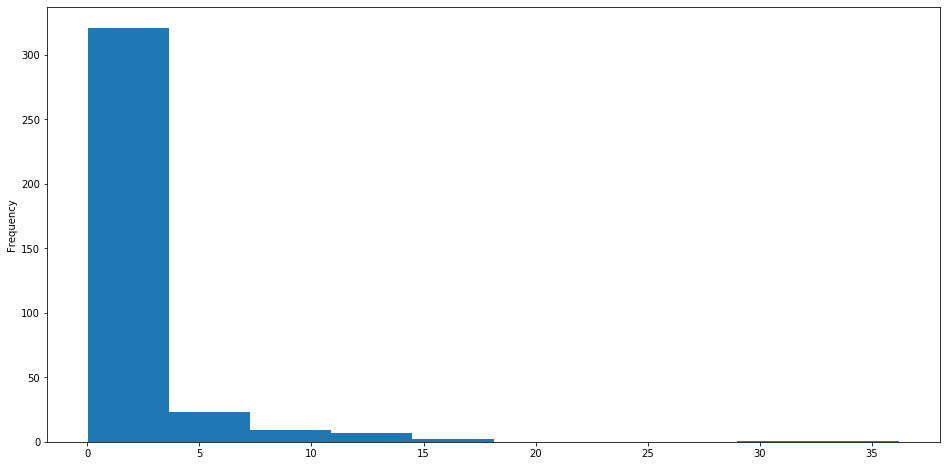

In [181]:
model_df.ei_pop.plot.hist()

In [182]:
model_df.ei_pop.min(), model_df.ei_pop.max(), model_df.ei_pop.median()

(0.022598233863767452, 36.22111364460772, 1.052920732351722)

In [183]:
# calc market_volume_nc for the year
model_df["market_volume_nc"] = model_df.groupby(
    "year"
).total_mortgage_volume_nc.transform("sum")

# calculate market growth rate from prior year
model_df["market_volume_delta_nc"] = np.where(
    model_df.year > 2006, model_df["market_volume_nc"].pct_change(), np.nan
)

# calc evolution index
model_df["ei_nc"] = (1 + model_df.city_state_vol_delta_nc) / (
    1 + model_df.market_volume_delta_nc
)

model_df[
    ((model_df.city == "Atlanta") & (model_df.state == "GA"))
    | ((model_df.city == "Austin") & (model_df.state == "TX"))
].sort_values(by=["city", "state", "year"])

,city,state,year,quantity_of_mortgages_pop,total_mortgage_volume_pop,average_mortgage_volume_pop,median_mortgage_amount_pop,quantity_of_mortgages_nc,total_mortgage_volume_nc,average_mortgage_volume_nc,median_mortgage_amount_nc,label,city_state_vol_delta_pop,city_state_vol_delta_nc,city_state_qty_delta_pop,city_state_qty_delta_nc,market_volume_pop,market_volume_delta_pop,market_volume_nc,market_volume_delta_nc,ei_pop,ei_nc,city_state
0,Atlanta,GA,2006,6,33186800,5.531133e+06,4457100.0,2.0,9181100.0,4.590550e+06,4590550.0,False,NaN,NaN,NaN,NaN,7088073068,NaN,6.454059e+07,NaN,NaN,NaN,Atlanta_GA
1,Atlanta,GA,2007,9,29105800,3.233978e+06,2990200.0,2.0,4541700.0,2.270850e+06,2270850.0,False,-0.122971,-0.505321,0.500000,0.000000,5203386464,-0.265895,9.562830e+07,0.481677,1.194693,0.333864,Atlanta_GA
2,Atlanta,GA,2008,2,6735000,3.367500e+06,3367500.0,1.0,4950000.0,4.950000e+06,4950000.0,False,-0.768603,0.089900,-0.777778,-0.500000,4593331384,-0.117242,5.356700e+07,-0.439842,0.262130,1.945700,Atlanta_GA
3,Atlanta,GA,2009,9,49972900,5.552544e+06,4400000.0,1.0,3750000.0,3.750000e+06,3750000.0,False,6.419881,-0.242424,3.500000,0.000000,8138285946,0.771761,3.311895e+08,5.182715,4.187856,0.122531,Atlanta_GA
4,Atlanta,GA,2010,11,68788385,6.253490e+06,5196100.0,2.0,7203500.0,3.601750e+06,3601750.0,False,0.376514,0.920933,0.222222,1.000000,16444346058,1.020615,2.638679e+08,-0.203272,0.681235,2.411028,Atlanta_GA
5,Atlanta,GA,2011,10,56215900,5.621590e+06,4341850.0,2.0,9274500.0,4.637250e+06,4637250.0,False,-0.182770,0.287499,-0.090909,0.000000,17678683423,0.075062,5.473695e+08,1.074407,0.760170,0.620659,Atlanta_GA
6,Atlanta,GA,2012,12,56365900,4.697158e+06,3250100.0,1.0,3000000.0,3.000000e+06,3000000.0,False,0.002668,-0.676532,0.200000,-0.500000,22203696331,0.255959,4.572713e+08,-0.164602,0.798329,0.387202,Atlanta_GA
7,Atlanta,GA,2013,19,138582800,7.293832e+06,6133600.0,NaN,NaN,NaN,NaN,False,1.458628,0.000000,0.583333,0.000000,25474256780,0.147298,2.090131e+08,-0.542912,2.142973,2.187764,Atlanta_GA
8,Atlanta,GA,2014,11,106803300,9.709391e+06,4919700.0,1.0,15861400.0,1.586140e+07,15861400.0,False,-0.229318,4.287133,-0.421053,0.000000,16642823555,-0.346681,2.851686e+08,0.364358,1.179641,3.875182,Atlanta_GA
9,Atlanta,GA,2015,4,20900000,5.225000e+06,5750000.0,1.0,5500000.0,5.500000e+06,5500000.0,False,-0.804313,-0.653246,-0.636364,0.000000,13777111433,-0.172189,3.500952e+08,0.227678,0.236391,0.282447,Atlanta_GA


In [184]:
model_df["ei_label"] = np.where(model_df.ei_pop > 1, 1, 0)
model_df

,city,state,year,quantity_of_mortgages_pop,total_mortgage_volume_pop,average_mortgage_volume_pop,median_mortgage_amount_pop,quantity_of_mortgages_nc,total_mortgage_volume_nc,average_mortgage_volume_nc,median_mortgage_amount_nc,label,city_state_vol_delta_pop,city_state_vol_delta_nc,city_state_qty_delta_pop,city_state_qty_delta_nc,market_volume_pop,market_volume_delta_pop,market_volume_nc,market_volume_delta_nc,ei_pop,ei_nc,city_state,ei_label
0,Atlanta,GA,2006,6,33186800,5.531133e+06,4457100.0,2.0,9181100.0,4590550.0,4590550.0,False,NaN,NaN,NaN,NaN,7088073068,NaN,6.454059e+07,NaN,NaN,NaN,Atlanta_GA,0
1,Atlanta,GA,2007,9,29105800,3.233978e+06,2990200.0,2.0,4541700.0,2270850.0,2270850.0,False,-0.122971,-0.505321,0.500000,0.000000,5203386464,-0.265895,9.562830e+07,0.481677,1.194693,0.333864,Atlanta_GA,1
2,Atlanta,GA,2008,2,6735000,3.367500e+06,3367500.0,1.0,4950000.0,4950000.0,4950000.0,False,-0.768603,0.089900,-0.777778,-0.500000,4593331384,-0.117242,5.356700e+07,-0.439842,0.262130,1.945700,Atlanta_GA,0
3,Atlanta,GA,2009,9,49972900,5.552544e+06,4400000.0,1.0,3750000.0,3750000.0,3750000.0,False,6.419881,-0.242424,3.500000,0.000000,8138285946,0.771761,3.311895e+08,5.182715,4.187856,0.122531,Atlanta_GA,1
4,Atlanta,GA,2010,11,68788385,6.253490e+06,5196100.0,2.0,7203500.0,3601750.0,3601750.0,False,0.376514,0.920933,0.222222,1.000000,16444346058,1.020615,2.638679e+08,-0.203272,0.681235,2.411028,Atlanta_GA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,Washington,DC,2016,8,312836100,3.910451e+07,27352400.0,2.0,54704800.0,27352400.0,27352400.0,False,0.445886,2.402124,0.000000,0.000000,16320043780,0.184577,3.559298e+08,0.016666,1.220593,3.346355,Washington_DC,1
386,Washington,DC,2017,8,137557300,1.719466e+07,11693000.0,1.0,12735000.0,12735000.0,12735000.0,False,-0.560290,-0.767205,0.000000,-0.500000,21444975319,0.314027,5.235360e+08,0.470897,0.334628,0.158267,Washington_DC,0
387,Washington,DC,2018,7,169249000,2.417843e+07,25450000.0,3.0,46635000.0,15545000.0,15235000.0,False,0.230389,2.661955,-0.125000,2.000000,20223485898,-0.056959,1.067680e+09,1.039364,1.304704,1.795636,Washington_DC,1
388,Washington,DC,2019,5,61723450,1.234469e+07,9300000.0,1.0,18333450.0,18333450.0,18333450.0,False,-0.635310,-0.606874,-0.285714,-0.666667,17830952288,-0.118305,4.875318e+08,-0.543373,0.413624,0.860935,Washington_DC,0


In [185]:
model_df[
    ((model_df.city == "Atlanta") & (model_df.state == "GA"))
    | ((model_df.city == "Austin") & (model_df.state == "TX"))
].sort_values(by=["city", "state", "year"])

,city,state,year,quantity_of_mortgages_pop,total_mortgage_volume_pop,average_mortgage_volume_pop,median_mortgage_amount_pop,quantity_of_mortgages_nc,total_mortgage_volume_nc,average_mortgage_volume_nc,median_mortgage_amount_nc,label,city_state_vol_delta_pop,city_state_vol_delta_nc,city_state_qty_delta_pop,city_state_qty_delta_nc,market_volume_pop,market_volume_delta_pop,market_volume_nc,market_volume_delta_nc,ei_pop,ei_nc,city_state,ei_label
0,Atlanta,GA,2006,6,33186800,5.531133e+06,4457100.0,2.0,9181100.0,4.590550e+06,4590550.0,False,NaN,NaN,NaN,NaN,7088073068,NaN,6.454059e+07,NaN,NaN,NaN,Atlanta_GA,0
1,Atlanta,GA,2007,9,29105800,3.233978e+06,2990200.0,2.0,4541700.0,2.270850e+06,2270850.0,False,-0.122971,-0.505321,0.500000,0.000000,5203386464,-0.265895,9.562830e+07,0.481677,1.194693,0.333864,Atlanta_GA,1
2,Atlanta,GA,2008,2,6735000,3.367500e+06,3367500.0,1.0,4950000.0,4.950000e+06,4950000.0,False,-0.768603,0.089900,-0.777778,-0.500000,4593331384,-0.117242,5.356700e+07,-0.439842,0.262130,1.945700,Atlanta_GA,0
3,Atlanta,GA,2009,9,49972900,5.552544e+06,4400000.0,1.0,3750000.0,3.750000e+06,3750000.0,False,6.419881,-0.242424,3.500000,0.000000,8138285946,0.771761,3.311895e+08,5.182715,4.187856,0.122531,Atlanta_GA,1
4,Atlanta,GA,2010,11,68788385,6.253490e+06,5196100.0,2.0,7203500.0,3.601750e+06,3601750.0,False,0.376514,0.920933,0.222222,1.000000,16444346058,1.020615,2.638679e+08,-0.203272,0.681235,2.411028,Atlanta_GA,0
5,Atlanta,GA,2011,10,56215900,5.621590e+06,4341850.0,2.0,9274500.0,4.637250e+06,4637250.0,False,-0.182770,0.287499,-0.090909,0.000000,17678683423,0.075062,5.473695e+08,1.074407,0.760170,0.620659,Atlanta_GA,0
6,Atlanta,GA,2012,12,56365900,4.697158e+06,3250100.0,1.0,3000000.0,3.000000e+06,3000000.0,False,0.002668,-0.676532,0.200000,-0.500000,22203696331,0.255959,4.572713e+08,-0.164602,0.798329,0.387202,Atlanta_GA,0
7,Atlanta,GA,2013,19,138582800,7.293832e+06,6133600.0,NaN,NaN,NaN,NaN,False,1.458628,0.000000,0.583333,0.000000,25474256780,0.147298,2.090131e+08,-0.542912,2.142973,2.187764,Atlanta_GA,1
8,Atlanta,GA,2014,11,106803300,9.709391e+06,4919700.0,1.0,15861400.0,1.586140e+07,15861400.0,False,-0.229318,4.287133,-0.421053,0.000000,16642823555,-0.346681,2.851686e+08,0.364358,1.179641,3.875182,Atlanta_GA,1
9,Atlanta,GA,2015,4,20900000,5.225000e+06,5750000.0,1.0,5500000.0,5.500000e+06,5500000.0,False,-0.804313,-0.653246,-0.636364,0.000000,13777111433,-0.172189,3.500952e+08,0.227678,0.236391,0.282447,Atlanta_GA,0


In [186]:
model_df[
    (model_df.ei_label == 0)
].sort_values(by=["city", "state", "year"])

,city,state,year,quantity_of_mortgages_pop,total_mortgage_volume_pop,average_mortgage_volume_pop,median_mortgage_amount_pop,quantity_of_mortgages_nc,total_mortgage_volume_nc,average_mortgage_volume_nc,median_mortgage_amount_nc,label,city_state_vol_delta_pop,city_state_vol_delta_nc,city_state_qty_delta_pop,city_state_qty_delta_nc,market_volume_pop,market_volume_delta_pop,market_volume_nc,market_volume_delta_nc,ei_pop,ei_nc,city_state,ei_label
0,Atlanta,GA,2006,6,33186800,5.531133e+06,4457100.0,2.0,9181100.0,4590550.0,4590550.0,False,NaN,NaN,NaN,NaN,7088073068,NaN,64540593.0,NaN,NaN,NaN,Atlanta_GA,0
2,Atlanta,GA,2008,2,6735000,3.367500e+06,3367500.0,1.0,4950000.0,4950000.0,4950000.0,False,-0.768603,0.089900,-0.777778,-0.500000,4593331384,-0.117242,53567000.0,-0.439842,0.262130,1.945700,Atlanta_GA,0
4,Atlanta,GA,2010,11,68788385,6.253490e+06,5196100.0,2.0,7203500.0,3601750.0,3601750.0,False,0.376514,0.920933,0.222222,1.000000,16444346058,1.020615,263867900.0,-0.203272,0.681235,2.411028,Atlanta_GA,0
5,Atlanta,GA,2011,10,56215900,5.621590e+06,4341850.0,2.0,9274500.0,4637250.0,4637250.0,False,-0.182770,0.287499,-0.090909,0.000000,17678683423,0.075062,547369542.0,1.074407,0.760170,0.620659,Atlanta_GA,0
6,Atlanta,GA,2012,12,56365900,4.697158e+06,3250100.0,1.0,3000000.0,3000000.0,3000000.0,False,0.002668,-0.676532,0.200000,-0.500000,22203696331,0.255959,457271300.0,-0.164602,0.798329,0.387202,Atlanta_GA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,Washington,DC,2010,11,242730300,2.206639e+07,13011300.0,2.0,98276600.0,49138300.0,49138300.0,False,0.628493,-0.011969,1.200000,0.000000,16444346058,1.020615,263867900.0,-0.203272,0.805939,1.240111,Washington_DC,0
381,Washington,DC,2012,5,115569500,2.311390e+07,11910300.0,1.0,53147200.0,53147200.0,53147200.0,False,-0.624020,-0.722873,-0.285714,-0.500000,22203696331,0.255959,457271300.0,-0.164602,0.299357,0.331730,Washington_DC,0
382,Washington,DC,2013,15,92850300,6.190020e+06,4581800.0,1.0,3640000.0,3640000.0,3640000.0,False,-0.196585,-0.931511,2.000000,0.000000,25474256780,0.147298,209013104.0,-0.542912,0.700267,0.149838,Washington_DC,0
386,Washington,DC,2017,8,137557300,1.719466e+07,11693000.0,1.0,12735000.0,12735000.0,12735000.0,False,-0.560290,-0.767205,0.000000,-0.500000,21444975319,0.314027,523536000.0,0.470897,0.334628,0.158267,Washington_DC,0
